In [3]:
import numpy as np 
import pandas as pd 
import openpyxl
import matplotlib.pyplot as plt 

In [4]:
data = pd.read_excel('Indagine sulla Cultura della Sicurezza in Webuild SS Jonica.xlsx', header=1)
data

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,"Nel mio Cantiere viene promossa la condivisione di problemi, osservazioni, esperienze e buone pratiche di Sicurezza",...,"Nel mio Cantiere, le procedure di Sicurezza sono prodotte e aggiornate tenendo in considerazione le proposte di integrazione o modifica da parte dei lavoratori",Le procedure e le istruzioni operative applicabili in condizioni di Emergenza sono utili ed efficaci,"Hai partecipato a programmi del Gruppo Webuild per sui temi della consapevolezza, formazione e leadership?",Conoscenza delle Your Lifesaving Rules / Regole Salvavita,Safety Builder Program (workshop e safer),Nessuna delle precedenti,Qual è la tua età anagrafica?,Indica la tua anzianità di servizio in Webuild:,Indica la tua posizione lavorativa in Webuild:,Qual è la tua area di lavoro prevalente?
0,118841604341,460030579,2025-04-11 15:15:57,2025-04-11 15:45:04,62.101.78.68,NaN,NaN,NaN,NaN,6 = Totalmente in accordo,...,3,3,NaN,Conoscenza delle Your Lifesaving Rules / Regol...,NaN,NaN,> 50 anni,< 3 anni,"Operatori mezzi/macchine di Cantiere: gruisti,...",Prevalentemente in Cantiere all’Aperto
1,118841603249,460030579,2025-04-11 15:14:07,2025-04-11 15:40:52,62.101.78.68,NaN,NaN,NaN,NaN,3,...,6 = Totalmente in accordo,6 = Totalmente in accordo,NaN,NaN,NaN,Nessuna delle precedenti,30 – 50 anni,< 3 anni,"Operatori mezzi/macchine di Cantiere: gruisti,...",Prevalentemente in Cantiere all’Aperto
2,118841603258,460030579,2025-04-11 15:14:00,2025-04-11 15:40:16,62.101.78.68,NaN,NaN,NaN,NaN,6 = Totalmente in accordo,...,6 = Totalmente in accordo,6 = Totalmente in accordo,NaN,Conoscenza delle Your Lifesaving Rules / Regol...,NaN,NaN,< 30 anni,< 3 anni,"Operatori mezzi/macchine di Cantiere: gruisti,...",Sia a supporto in Galleria che all’Aperto
3,118841603991,460030579,2025-04-11 15:15:23,2025-04-11 15:40:16,62.101.78.68,NaN,NaN,NaN,NaN,2,...,3,5,NaN,NaN,NaN,Nessuna delle precedenti,30 – 50 anni,< 3 anni,"Operatori mezzi/macchine di Cantiere: gruisti,...",Prevalentemente in Cantiere all’Aperto
4,118841603317,460030579,2025-04-11 15:14:30,2025-04-11 15:37:08,62.101.78.68,NaN,NaN,NaN,NaN,2,...,Non lo so,4,NaN,NaN,NaN,Nessuna delle precedenti,30 – 50 anni,< 3 anni,"Operatori mezzi/macchine di Cantiere: gruisti,...",Prevalentemente in Cantiere all’Aperto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,118831997964,460012183,2025-03-31 16:57:29,2025-03-31 17:10:02,62.101.78.68,NaN,NaN,NaN,NaN,6 = Totalmente in accordo,...,Non lo so,6 = Totalmente in accordo,Celebrazione della Giornata Mondiale della Sic...,NaN,Safety Builder Program (workshop e safer),NaN,< 30 anni,3 – 10 anni,Personale tecnico-amministrativo d’Ufficio (DC...,NaN
573,118831998779,460012183,2025-03-31 16:58:23,2025-03-31 17:09:45,62.101.78.68,NaN,NaN,NaN,NaN,6 = Totalmente in accordo,...,6 = Totalmente in accordo,6 = Totalmente in accordo,Celebrazione della Giornata Mondiale della Sic...,NaN,Safety Builder Program (workshop e safer),NaN,> 50 anni,> 10 anni,Personale tecnico-amministrativo d’Ufficio (DC...,NaN
574,118832000478,460012183,2025-03-31 17:00:20,2025-03-31 17:05:50,62.101.78.68,NaN,NaN,NaN,NaN,4,...,6 = Totalmente in accordo,6 = Totalmente in accordo,NaN,NaN,NaN,Nessuna delle precedenti,< 30 anni,< 3 anni,Personale tecnico-amministrativo d’Ufficio (DC...,NaN
575,118831998261,460012183,2025-03-31 16:57:44,2025-03-31 17:02:26,62.101.78.68,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
master_mapping = {
    # Age/Experience scales
    '< 30 anni': 1, '30 – 50 anni': 2, '> 50 anni': 3,
    '< 3 anni': 1, '3 – 10 anni': 2, '> 10 anni': 3,
    
    # Agreement scales
    '6 = Totalmente in accordo': 6, 
    '1 = Totalmente in disaccordo': 1, 
    'Non lo so': 0
}
inv_map = {v: k for k, v in master_mapping.items()}

# Applica il mapping e risolvi il FutureWarning di Pandas
data = data.replace(master_mapping).infer_objects(copy=False)
# Apply to the entire dataframe regardless of column names
data = data.replace(master_mapping)
data

/var/folders/qy/_70my3js6f54hxt23_54rnp40000gn/T/ipykernel_3680/4218041466.py:14: Pandas4Warning: The copy keyword is deprecated and will be removed in a future version. Copy-on-Write is active in pandas since 3.0 which utilizes a lazy copy mechanism that defers copies until necessary. Use .copy() to make an eager copy if necessary.
  data = data.replace(master_mapping).infer_objects(copy=False)


,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,"Nel mio Cantiere viene promossa la condivisione di problemi, osservazioni, esperienze e buone pratiche di Sicurezza",...,"Nel mio Cantiere, le procedure di Sicurezza sono prodotte e aggiornate tenendo in considerazione le proposte di integrazione o modifica da parte dei lavoratori",Le procedure e le istruzioni operative applicabili in condizioni di Emergenza sono utili ed efficaci,"Hai partecipato a programmi del Gruppo Webuild per sui temi della consapevolezza, formazione e leadership?",Conoscenza delle Your Lifesaving Rules / Regole Salvavita,Safety Builder Program (workshop e safer),Nessuna delle precedenti,Qual è la tua età anagrafica?,Indica la tua anzianità di servizio in Webuild:,Indica la tua posizione lavorativa in Webuild:,Qual è la tua area di lavoro prevalente?
0,118841604341,460030579,2025-04-11 15:15:57,2025-04-11 15:45:04,62.101.78.68,NaN,NaN,NaN,NaN,6,...,3.0,3.0,NaN,Conoscenza delle Your Lifesaving Rules / Regol...,NaN,NaN,3.0,1.0,"Operatori mezzi/macchine di Cantiere: gruisti,...",Prevalentemente in Cantiere all’Aperto
1,118841603249,460030579,2025-04-11 15:14:07,2025-04-11 15:40:52,62.101.78.68,NaN,NaN,NaN,NaN,3,...,6.0,6.0,NaN,NaN,NaN,Nessuna delle precedenti,2.0,1.0,"Operatori mezzi/macchine di Cantiere: gruisti,...",Prevalentemente in Cantiere all’Aperto
2,118841603258,460030579,2025-04-11 15:14:00,2025-04-11 15:40:16,62.101.78.68,NaN,NaN,NaN,NaN,6,...,6.0,6.0,NaN,Conoscenza delle Your Lifesaving Rules / Regol...,NaN,NaN,1.0,1.0,"Operatori mezzi/macchine di Cantiere: gruisti,...",Sia a supporto in Galleria che all’Aperto
3,118841603991,460030579,2025-04-11 15:15:23,2025-04-11 15:40:16,62.101.78.68,NaN,NaN,NaN,NaN,2,...,3.0,5.0,NaN,NaN,NaN,Nessuna delle precedenti,2.0,1.0,"Operatori mezzi/macchine di Cantiere: gruisti,...",Prevalentemente in Cantiere all’Aperto
4,118841603317,460030579,2025-04-11 15:14:30,2025-04-11 15:37:08,62.101.78.68,NaN,NaN,NaN,NaN,2,...,0.0,4.0,NaN,NaN,NaN,Nessuna delle precedenti,2.0,1.0,"Operatori mezzi/macchine di Cantiere: gruisti,...",Prevalentemente in Cantiere all’Aperto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,118831997964,460012183,2025-03-31 16:57:29,2025-03-31 17:10:02,62.101.78.68,NaN,NaN,NaN,NaN,6,...,0.0,6.0,Celebrazione della Giornata Mondiale della Sic...,NaN,Safety Builder Program (workshop e safer),NaN,1.0,2.0,Personale tecnico-amministrativo d’Ufficio (DC...,NaN
573,118831998779,460012183,2025-03-31 16:58:23,2025-03-31 17:09:45,62.101.78.68,NaN,NaN,NaN,NaN,6,...,6.0,6.0,Celebrazione della Giornata Mondiale della Sic...,NaN,Safety Builder Program (workshop e safer),NaN,3.0,3.0,Personale tecnico-amministrativo d’Ufficio (DC...,NaN
574,118832000478,460012183,2025-03-31 17:00:20,2025-03-31 17:05:50,62.101.78.68,NaN,NaN,NaN,NaN,4,...,6.0,6.0,NaN,NaN,NaN,Nessuna delle precedenti,1.0,1.0,Personale tecnico-amministrativo d’Ufficio (DC...,NaN
575,118831998261,460012183,2025-03-31 16:57:44,2025-03-31 17:02:26,62.101.78.68,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Campione

In [6]:
anagrafica = {}

def get_clean_freq(serie):
    assoluta = serie.value_counts()
    percentuale = (serie.value_counts(normalize=True) * 100).round(2)

    df = pd.DataFrame({
        'Conteggio': assoluta,
        'Percentuale %': percentuale
    })
    
    serie_numerica = pd.to_numeric(serie, errors='coerce')
    
    if not serie_numerica.dropna().empty:
        mean = serie_numerica[serie_numerica != 0].mean() if np.any(serie_numerica != 0) else 0
        df['Media'] = round(mean, 2)

    df.index.name = 'Categoria'
    return df.sort_index()


colonne_anagrafica = [
    'Qual è la tua area di lavoro prevalente?',
    'Indica la tua posizione lavorativa in Webuild:',
    'Qual è la tua età anagrafica?',
    'Indica la tua anzianità di servizio in Webuild:'
]

for col in colonne_anagrafica:
    if col in data.columns:
        anagrafica[col] = get_clean_freq(data[col])

anagrafica


{'Qual è la tua area di lavoro prevalente?':                                            Conteggio  Percentuale %
 Categoria                                                          
 Prevalentemente in Cantiere Galleria             114          25.05
 Prevalentemente in Cantiere all’Aperto           243          53.41
 Sia a supporto in Galleria che all’Aperto         98          21.54,
 'Indica la tua posizione lavorativa in Webuild:':                                                     Conteggio  Percentuale %
 Categoria                                                                   
 Lavoratore di Cantiere: carpentieri, ferraioli,...        255          45.29
 Operatori mezzi/macchine di Cantiere: gruisti, ...        162          28.77
 Personale tecnico di produzione Cantiere (CC, A...         51           9.06
 Personale tecnico-amministrativo d’Ufficio (DC,...         95          16.87,
 'Qual è la tua età anagrafica?':            Conteggio  Percentuale %  Media
 Categoria    

In [7]:
def get_summary_dataset(subset):
    rows = []
    for col in subset.columns:
        perc = subset[col].value_counts(normalize=True) * 100
        df_row = pd.DataFrame(perc).T
        df_row.index = [col]
        rows.append(df_row)
    
    dataset = pd.concat(rows).fillna(0)
    dataset = dataset.sort_index(axis=1, ascending=True)
    
    # Calcola medie escludendo gli zeri (sostituendoli con NaN)
    medie = subset.apply(pd.to_numeric, errors='coerce').replace(0, np.nan).mean()
    
    dataset['Media'] = medie.round(2)
    dataset['Media_analisi'] = dataset['Media'].mean().round(2)
    
    return dataset


Comunicazione

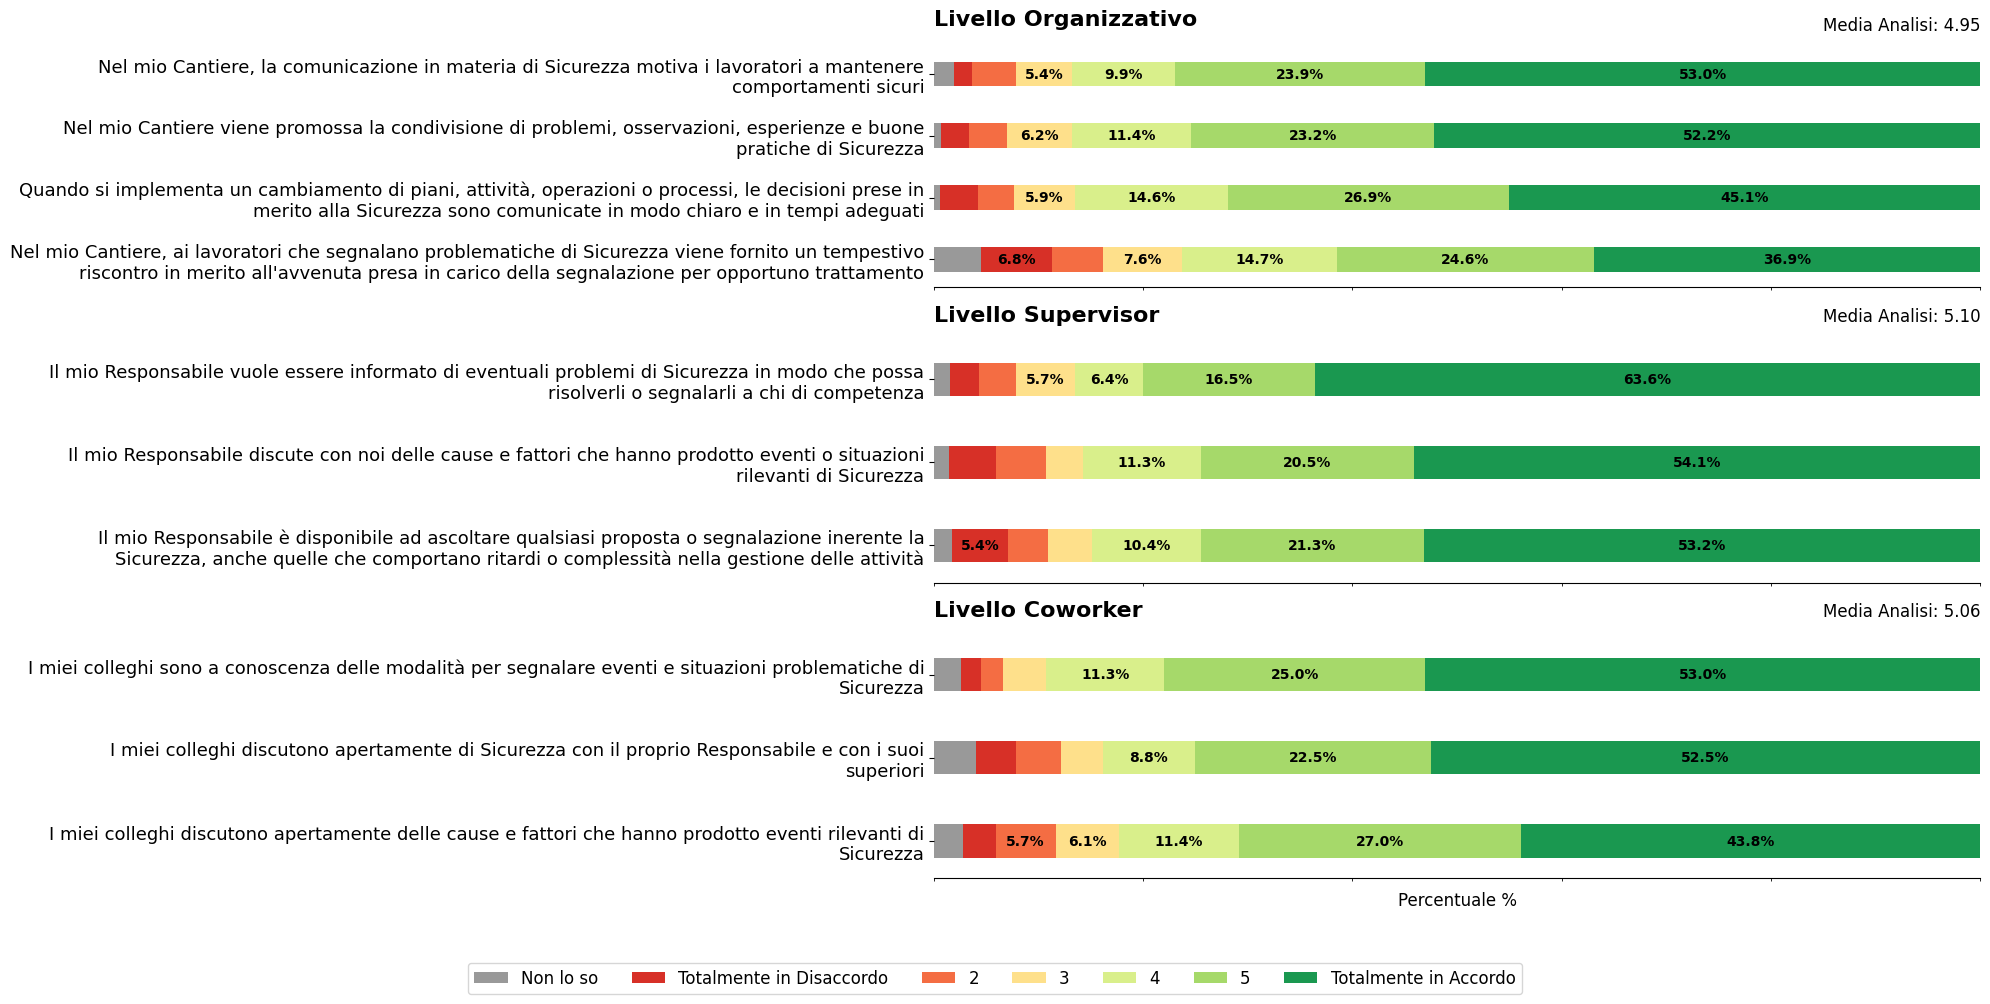

,0,1,2,3,4,5,6,Media,Media_analisi
"Nel mio Cantiere, la comunicazione in materia di Sicurezza motiva i lavoratori a mantenere comportamenti sicuri",1.906412,1.733102,4.159445,5.372617,9.878683,23.916811,53.032929,5.13,4.94
"Nel mio Cantiere viene promossa la condivisione di problemi, osservazioni, esperienze e buone pratiche di Sicurezza",0.693241,2.599653,3.639515,6.239168,11.438475,23.223570,52.166378,5.07,4.94
"Quando si implementa un cambiamento di piani, attività, operazioni o processi, le decisioni prese in merito alla Sicurezza sono comunicate in modo chiaro e in tempi adeguati",0.519931,3.639515,3.466205,5.892548,14.558059,26.863085,45.060659,4.94,4.94
"Nel mio Cantiere, ai lavoratori che segnalano problematiche di Sicurezza viene fornito un tempestivo riscontro in merito all'avvenuta presa in carico della segnalazione per opportuno trattamento",4.506066,6.759099,4.852686,7.625650,14.731369,24.610052,36.915078,4.64,4.94
Il mio Responsabile vuole essere informato di eventuali problemi di Sicurezza in modo che possa risolverli o segnalarli a chi di competenza,1.559792,2.772964,3.466205,5.719237,6.412478,16.464471,63.604853,5.25,5.10
Il mio Responsabile discute con noi delle cause e fattori che hanno prodotto eventi o situazioni rilevanti di Sicurezza,1.386482,4.506066,4.852686,3.466205,11.265165,20.450607,54.072790,5.03,5.10
"Il mio Responsabile è disponibile ad ascoltare qualsiasi proposta o segnalazione inerente la Sicurezza, anche quelle che comportano ritardi o complessità nella gestione delle attività",1.733102,5.372617,3.812825,4.159445,10.398614,21.317158,53.206239,5.02,5.10
I miei colleghi sono a conoscenza delle modalità per segnalare eventi e situazioni problematiche di Sicurezza,2.599653,1.906412,2.079723,4.159445,11.265165,24.956672,53.032929,5.20,5.06
I miei colleghi discutono apertamente di Sicurezza con il proprio Responsabile e con i suoi superiori,3.986135,3.812825,4.332756,3.986135,8.838821,22.530329,52.512998,5.08,5.06
I miei colleghi discutono apertamente delle cause e fattori che hanno prodotto eventi rilevanti di Sicurezza,2.772964,3.119584,5.719237,6.065858,11.438475,27.036395,43.847487,4.90,5.06


In [8]:
df_org = get_summary_dataset(data.iloc[:, 9:13]).sort_values(by=6, ascending=False)
df_sup = get_summary_dataset(data.iloc[:, 13:16]).sort_values(by=6, ascending=False)
df_cow = get_summary_dataset(data.iloc[:, 16:19]).sort_values(by=6, ascending=False)

# 2. Definiamo i nomi per la legenda (da 0 a 6)
mappa_nomi = {
    0: 'Non lo so', 
    1: 'Totalmente in Disaccordo', 
    2: '2', 
    3: '3', 
    4: '4', 
    5: '5', 
    6: 'Totalmente in Accordo'
}
colori = ['#999999', '#d73027', '#f46d43', '#fee08b', '#d9ef8b', '#a6d96a', '#1a9850']

piani_grafico = [
    (df_org, "Livello Organizzativo"),
    (df_sup, "Livello Supervisor"),
    (df_cow, "Livello Coworker")
]

import textwrap

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10), sharex=True)

for i, (df, titolo) in enumerate(piani_grafico):
    ax = axes[i]
    
    df_plot = df.iloc[:, :-2].copy()
    

    labels_wrapped = [textwrap.fill(label, width=100) for label in df_plot.index]
    df_plot.index = labels_wrapped

    plot = df_plot.plot(kind='barh', stacked=True, color=colori, ax=ax, legend=False, width=0.4)
    
    for container in ax.containers:
        labels = [f'{v.get_width():.1f}%' if v.get_width() > 5 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=10, fontweight='bold')
    
    ax.set_title(titolo, fontsize=16, fontweight='bold', loc='left', pad=15)
    ax.text(85,-0.7, f'Media Analisi: {df["Media"].mean():.2f}', fontsize= 12)
    
    ax.tick_params(axis='y', labelsize=13) 
    ax.tick_params(axis='x', labelsize=11)
    
    ax.invert_yaxis() 
    ax.set_xlim(0, 100)
    ax.set_xlabel("Percentuale %", fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.set_xticks([])

etichette_legenda = [mappa_nomi[int(c)] for c in df_org.columns[:-2]]
fig.legend(
    labels=etichette_legenda,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.02),
    ncol=7,
    frameon=True,
    fontsize=12
)

# Ottimizzazione spazi per evitare che i testi lunghi vengano tagliati
plt.tight_layout(rect=[0, 0.05, 1, 0.98]) 
plt.show()

# Verifica finale del dataset completo
df_completo = pd.concat([df_org, df_sup, df_cow])
df_completo

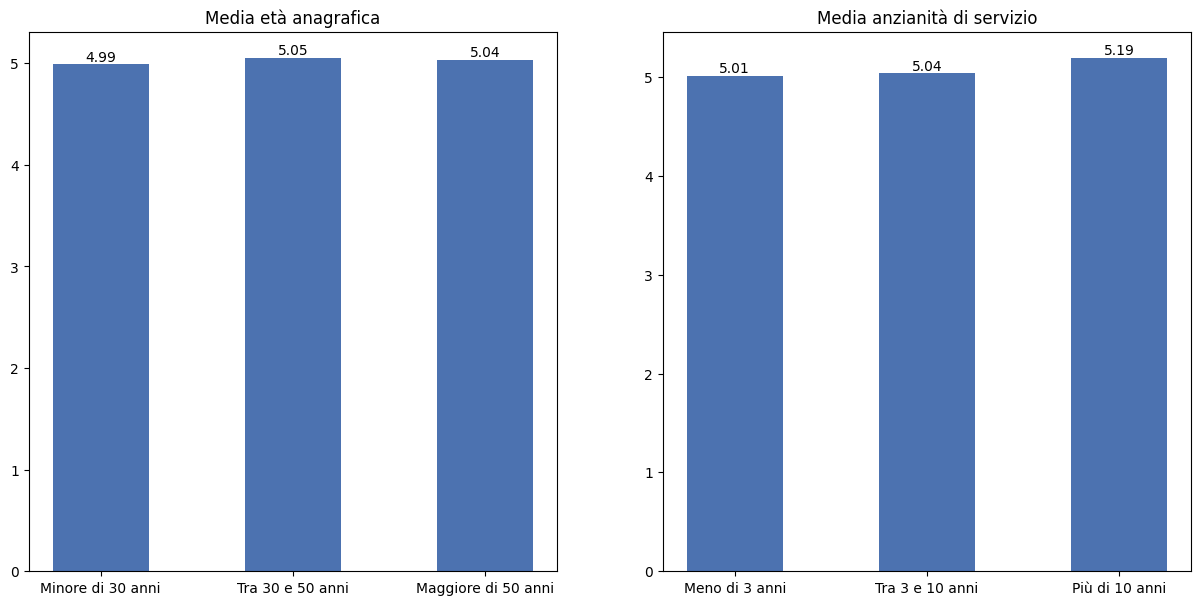

In [9]:
def get_stratified_means_full_benchmarks(data, subset_cols, stratifier_col):
    temp_df = data[subset_cols].apply(pd.to_numeric, errors='coerce').replace(0, np.nan)
    temp_df[stratifier_col] = data[stratifier_col]
    report_medie = temp_df.groupby(stratifier_col).mean().T
    
    for gruppo in report_medie.columns:
        report_medie[f'Media_eta_{gruppo}'] = report_medie[gruppo].mean()
    
    return report_medie.round(2)

# Definisci le sezioni di colonne
sezioni = [(9, 13), (13, 16), (16, 19)]

# Definisci le stratificazioni
stratificazioni = {
    'eta': {
        'col': 'Qual è la tua età anagrafica?',
        'ticks': ['Minore di 30 anni', 'Tra 30 e 50 anni', 'Maggiore di 50 anni'],
        'title': 'Media età anagrafica'
    },
    'age': {
        'col': 'Indica la tua anzianità di servizio in Webuild:',
        'ticks': ['Meno di 3 anni', 'Tra 3 e 10 anni', 'Più di 10 anni'],
        'title': 'Media anzianità di servizio'
    }
}

# Calcola tutti i report
risultati = {}
for nome, config in stratificazioni.items():
    reports = []
    for start, end in sezioni:
        report = get_stratified_means_full_benchmarks(
            data, 
            data.iloc[:, start:end].columns,
            config['col']
        )
        reports.append(report)
    risultati[nome] = pd.concat(reports)

# Crea il grafico
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

for idx, (nome, config) in enumerate(stratificazioni.items()):
    axes[idx].bar(config['ticks'], risultati[nome].iloc[:, :3].mean(), width=0.5, color='#4c72b0')
    axes[idx].set_title(config['title'])
    axes[idx].bar_label(
        axes[idx].containers[0], 
        labels=[f'{v.get_height():.2f}' for v in axes[idx].containers[0]], 
        label_type='edge', 
        color='black', 
        fontsize=10
    )

plt.show()

Proviamoce

Generazione di 8 set di grafici...

=== SET 1: Sezioni [(9, 13), (13, 16), (16, 19)] ===
Generando grafico stacked...


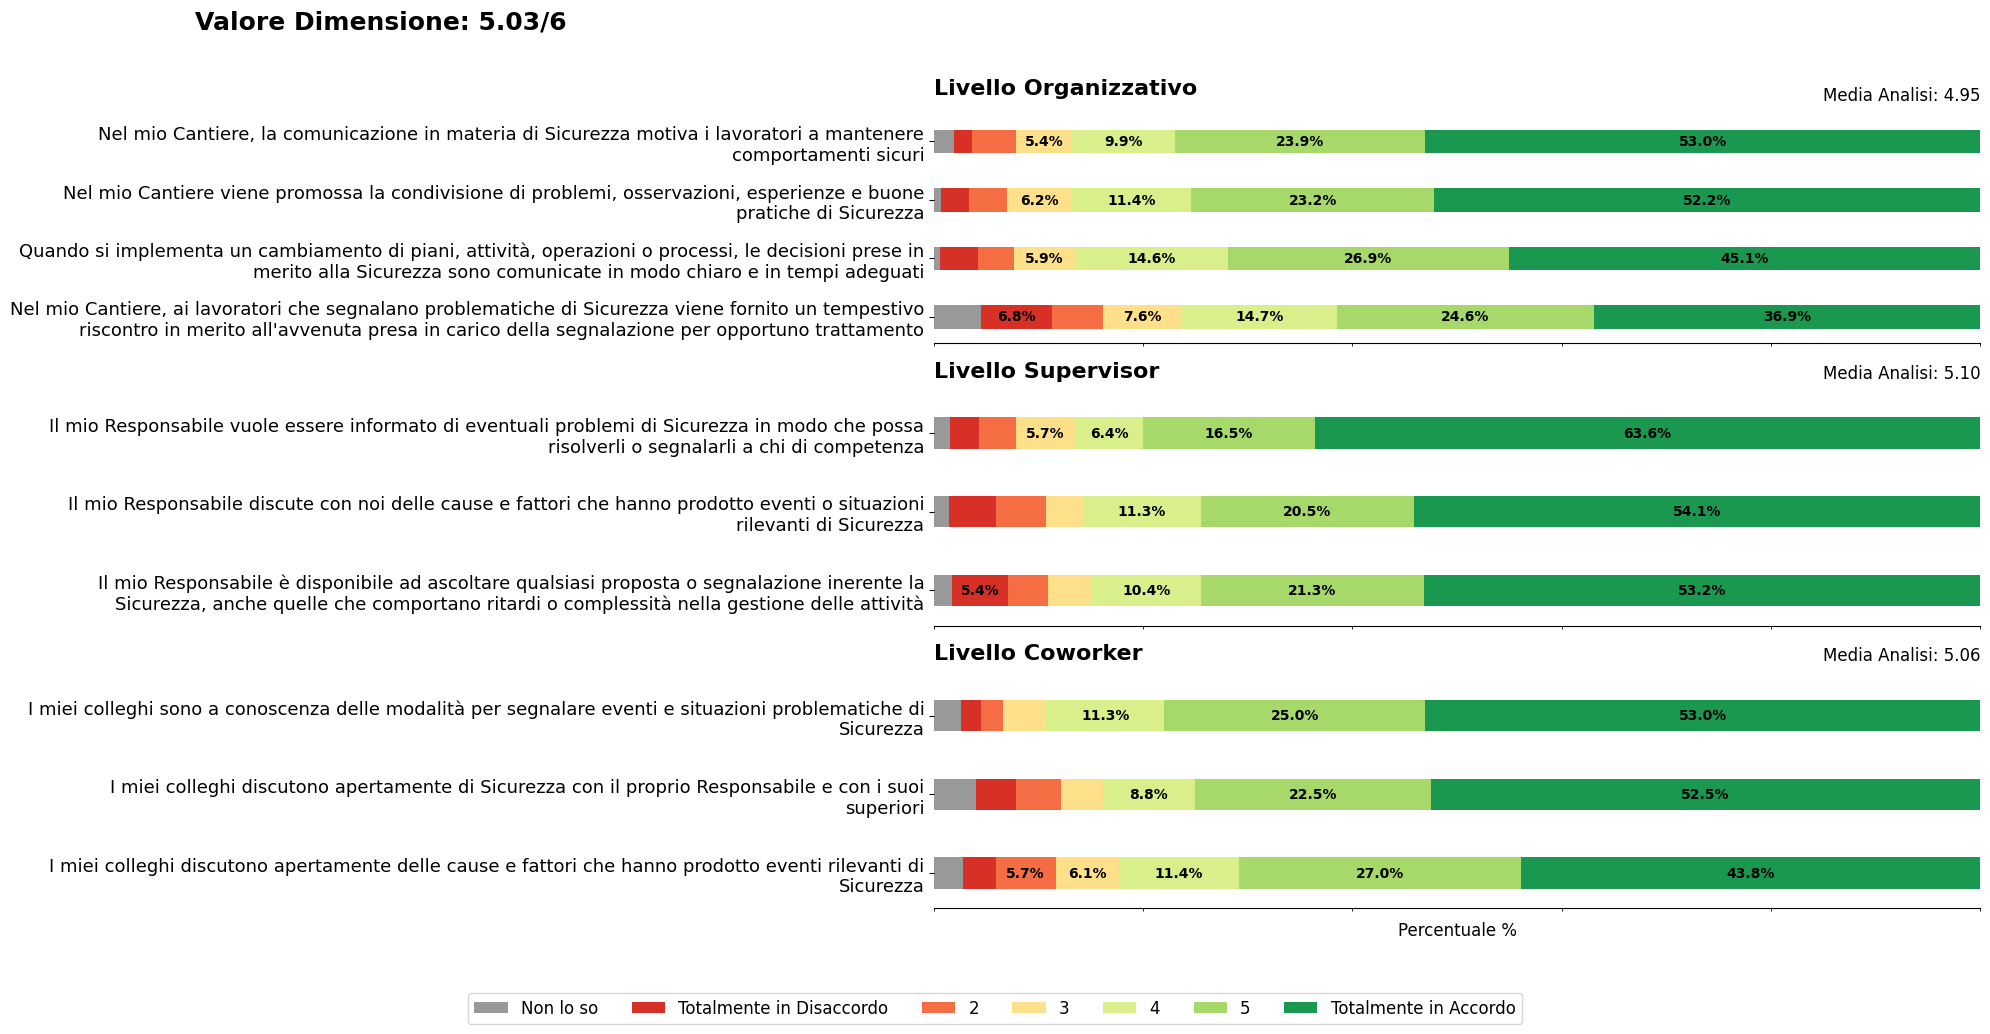

Generando grafici stratificati (età/anzianità)...


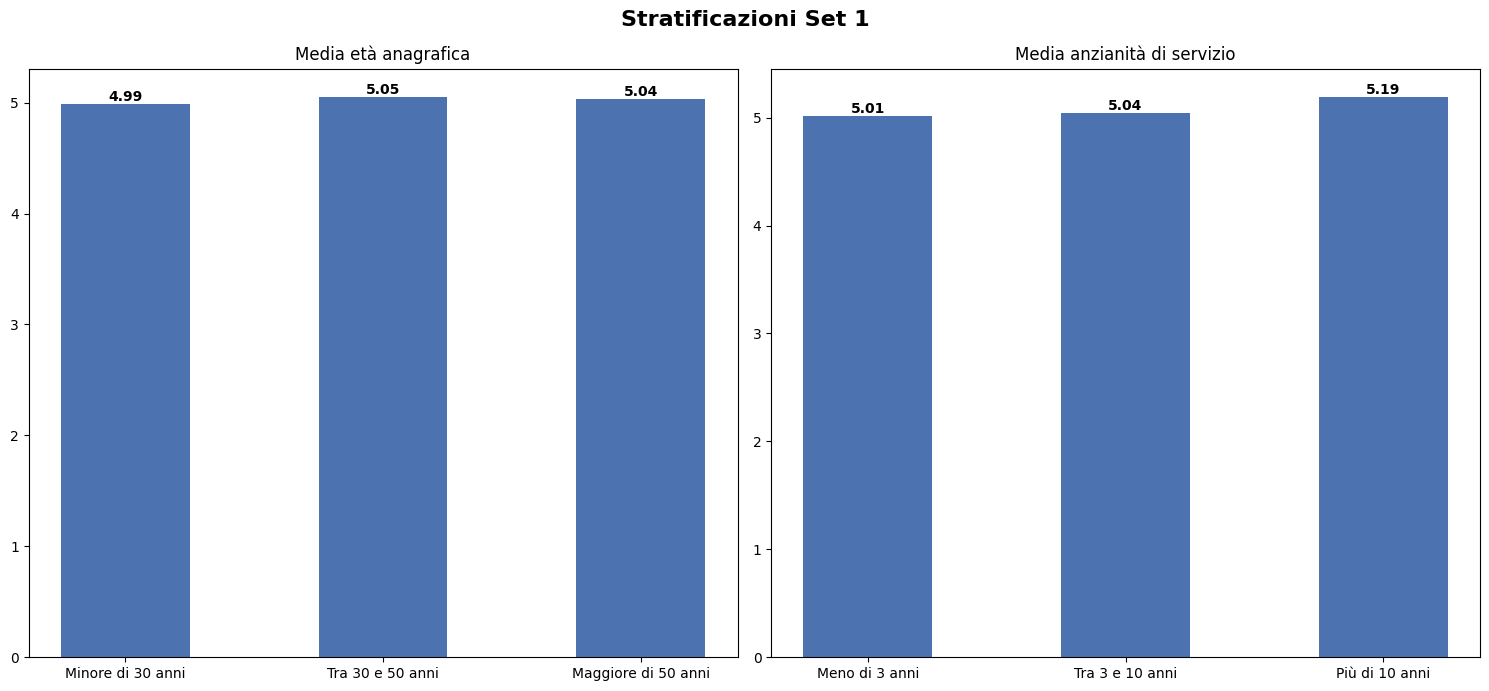

Set 1 completato!

=== SET 2: Sezioni [(19, 22), (22, 26), (26, 29)] ===
Generando grafico stacked...


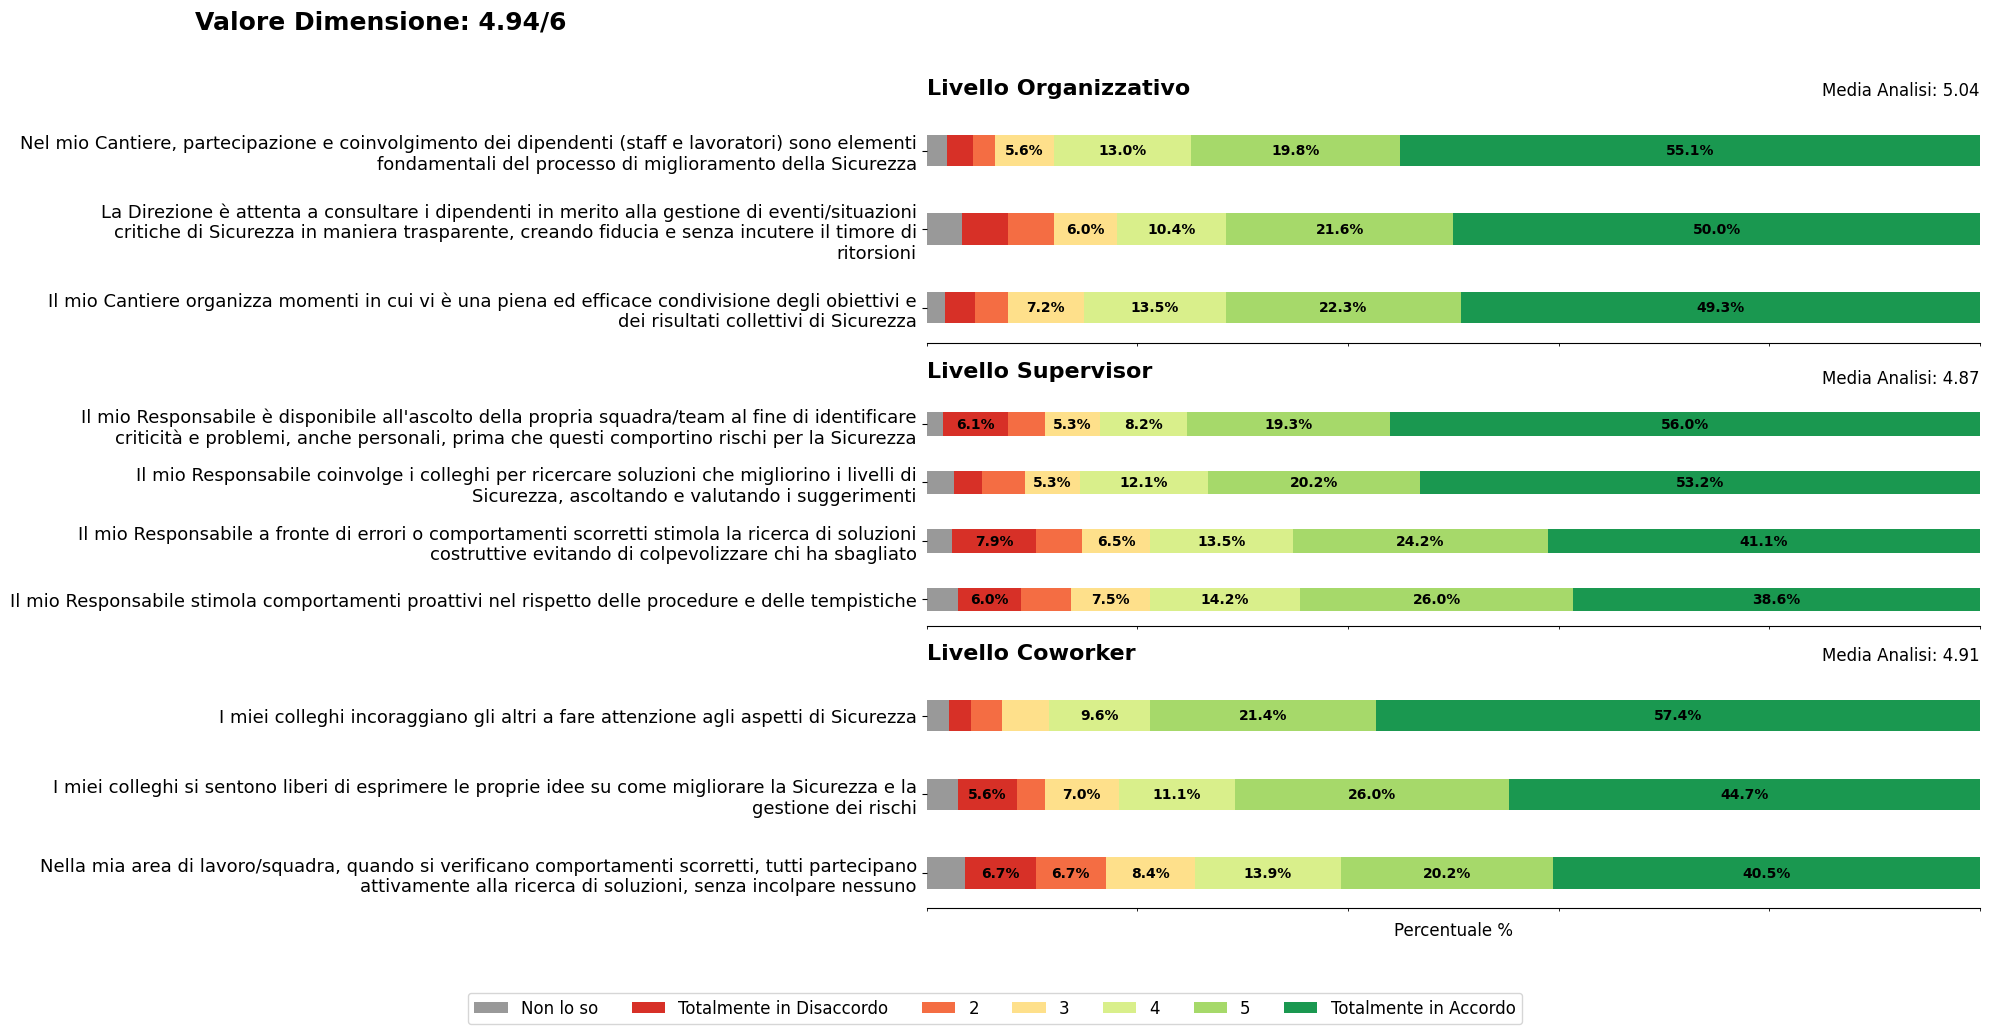

Generando grafici stratificati (età/anzianità)...


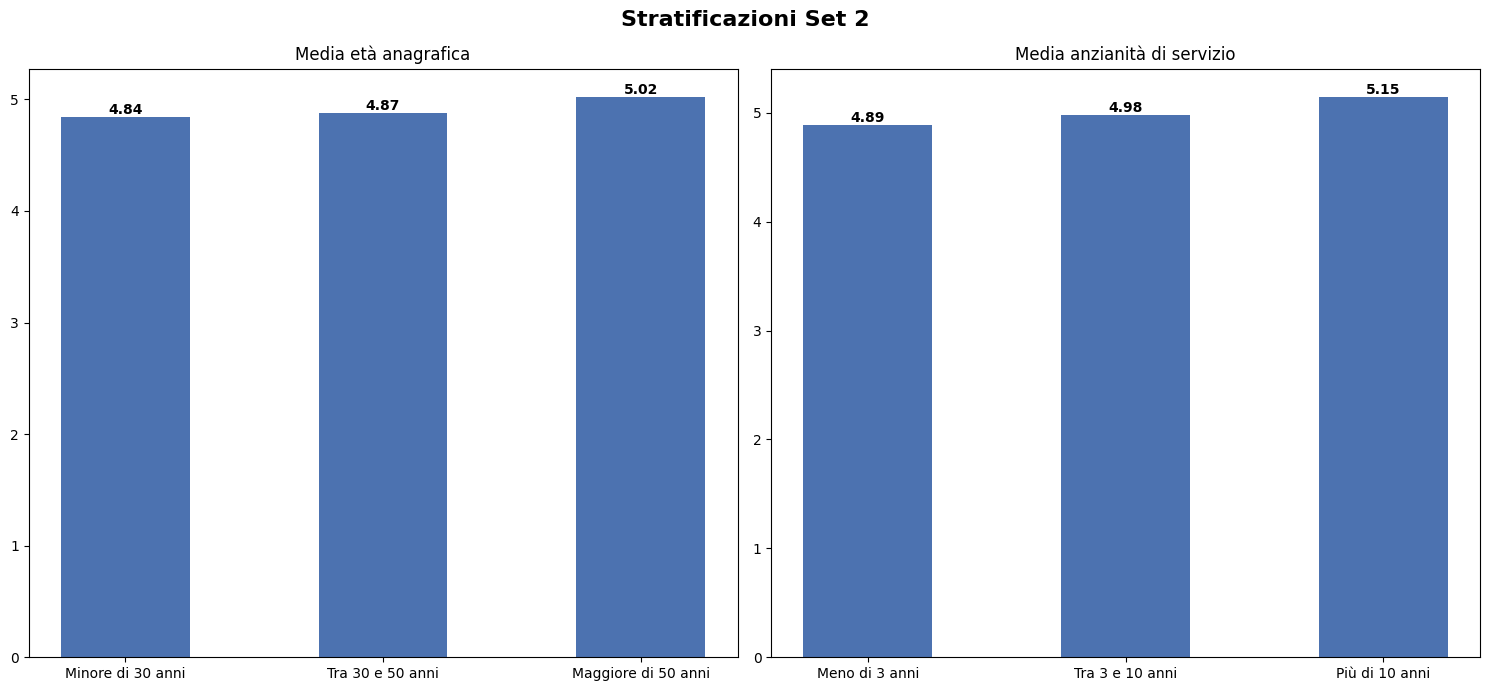

Set 2 completato!

=== SET 3: Sezioni [(29, 32), (32, 35), (35, 39)] ===
Generando grafico stacked...


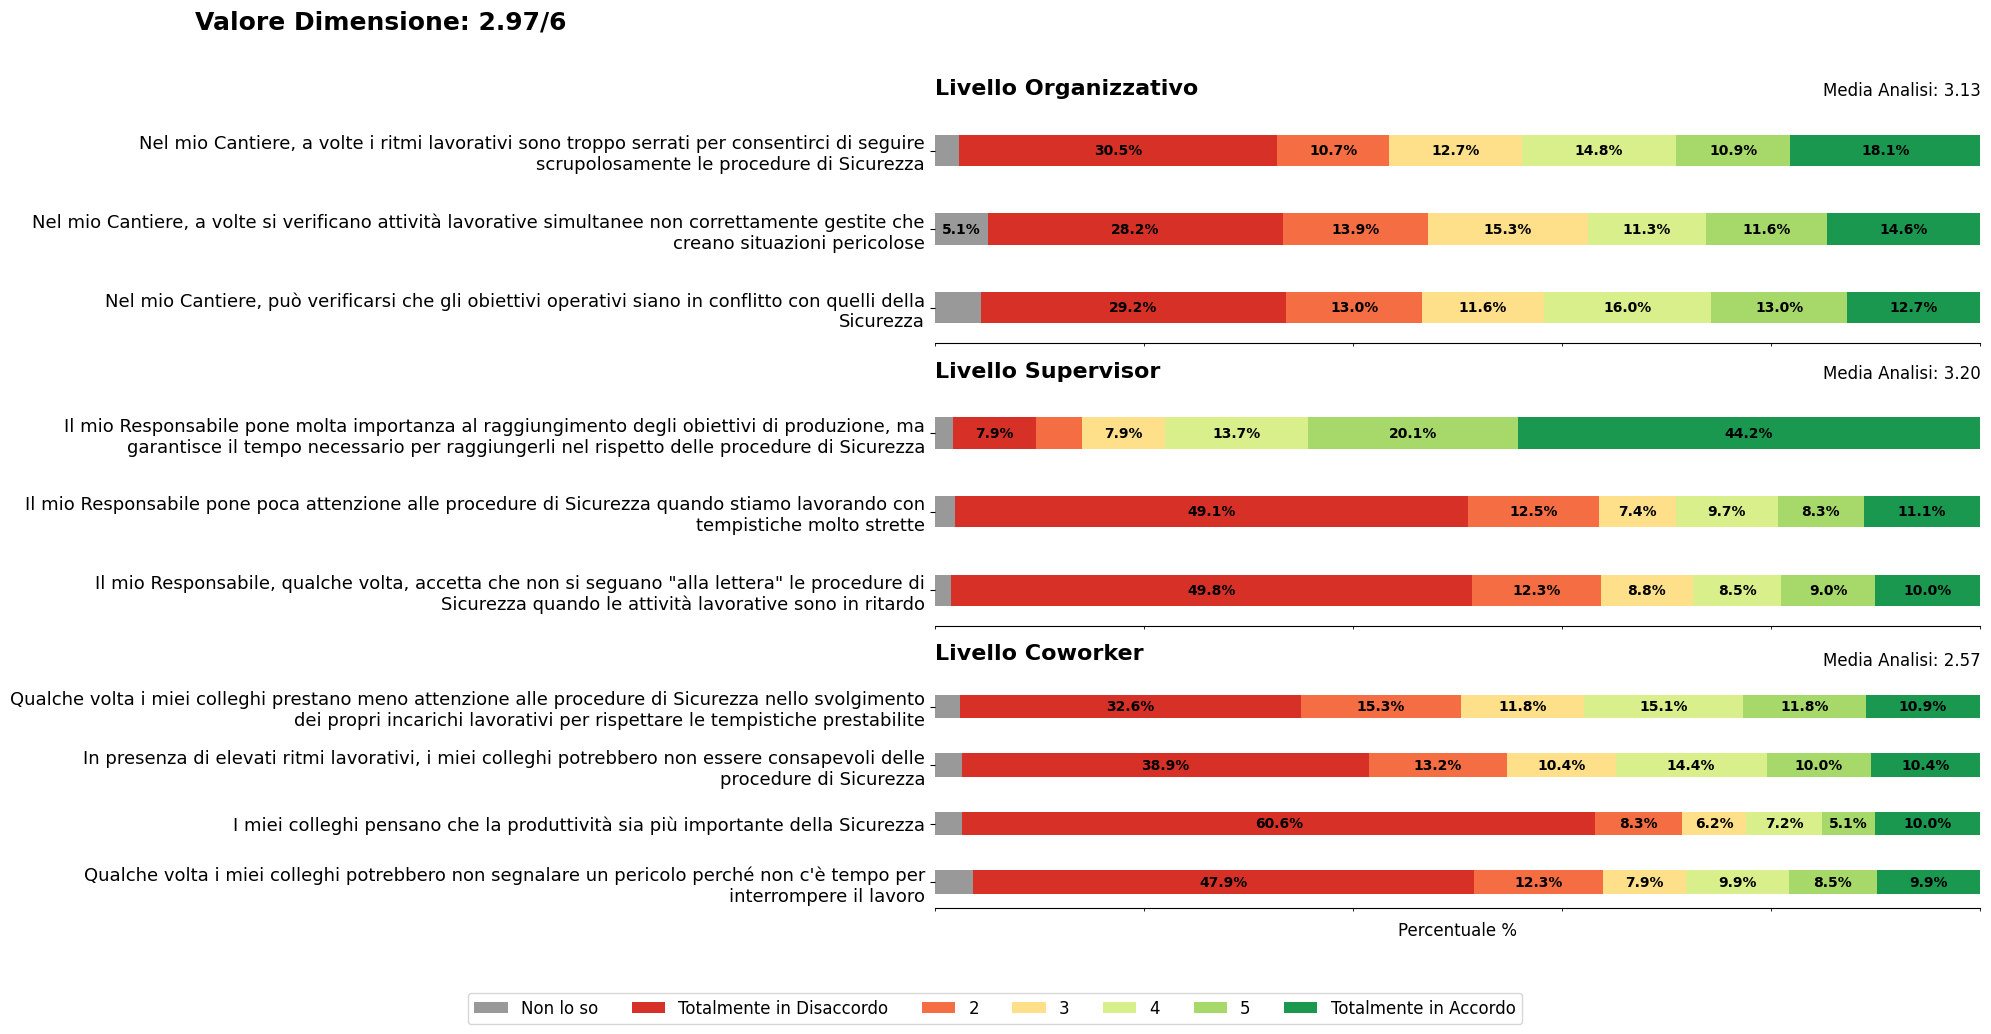

Generando grafici stratificati (età/anzianità)...


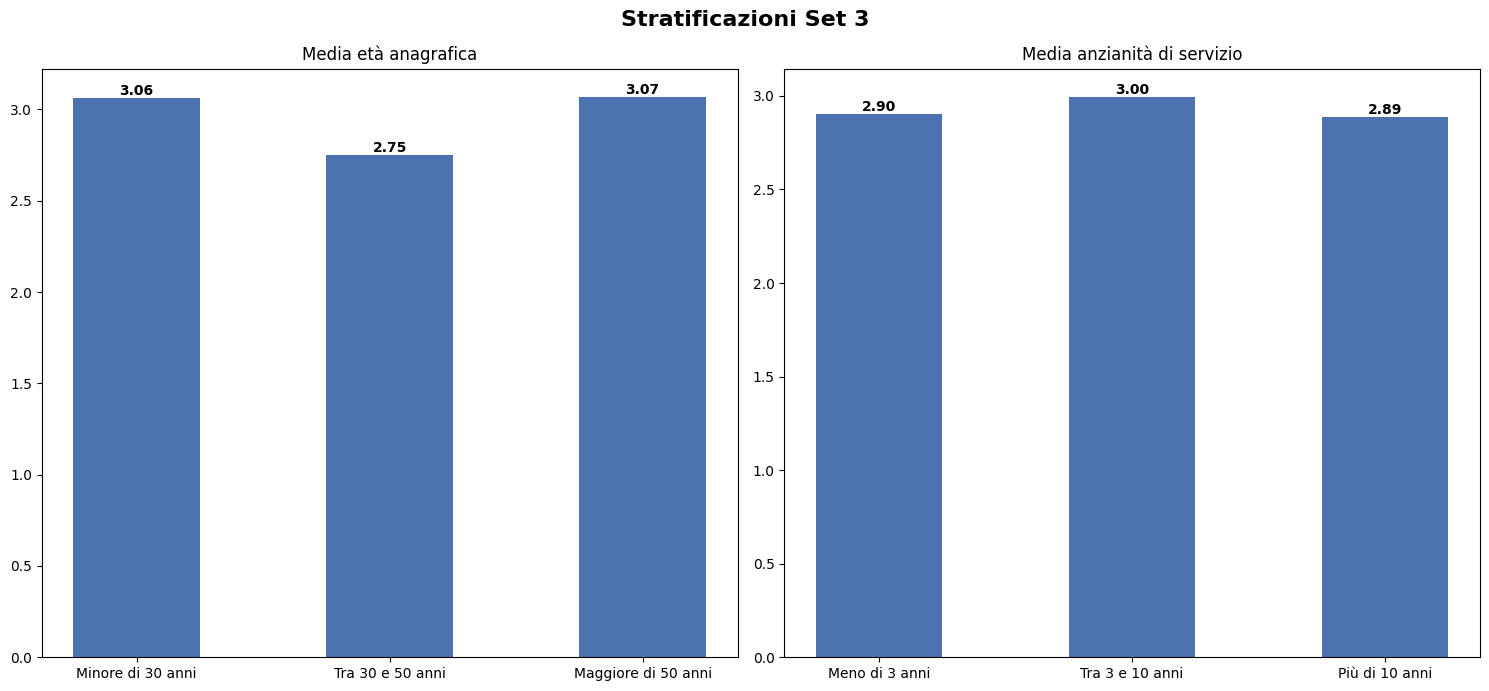

Set 3 completato!

=== SET 4: Sezioni [(39, 42), (42, 45), (45, 48)] ===
Generando grafico stacked...


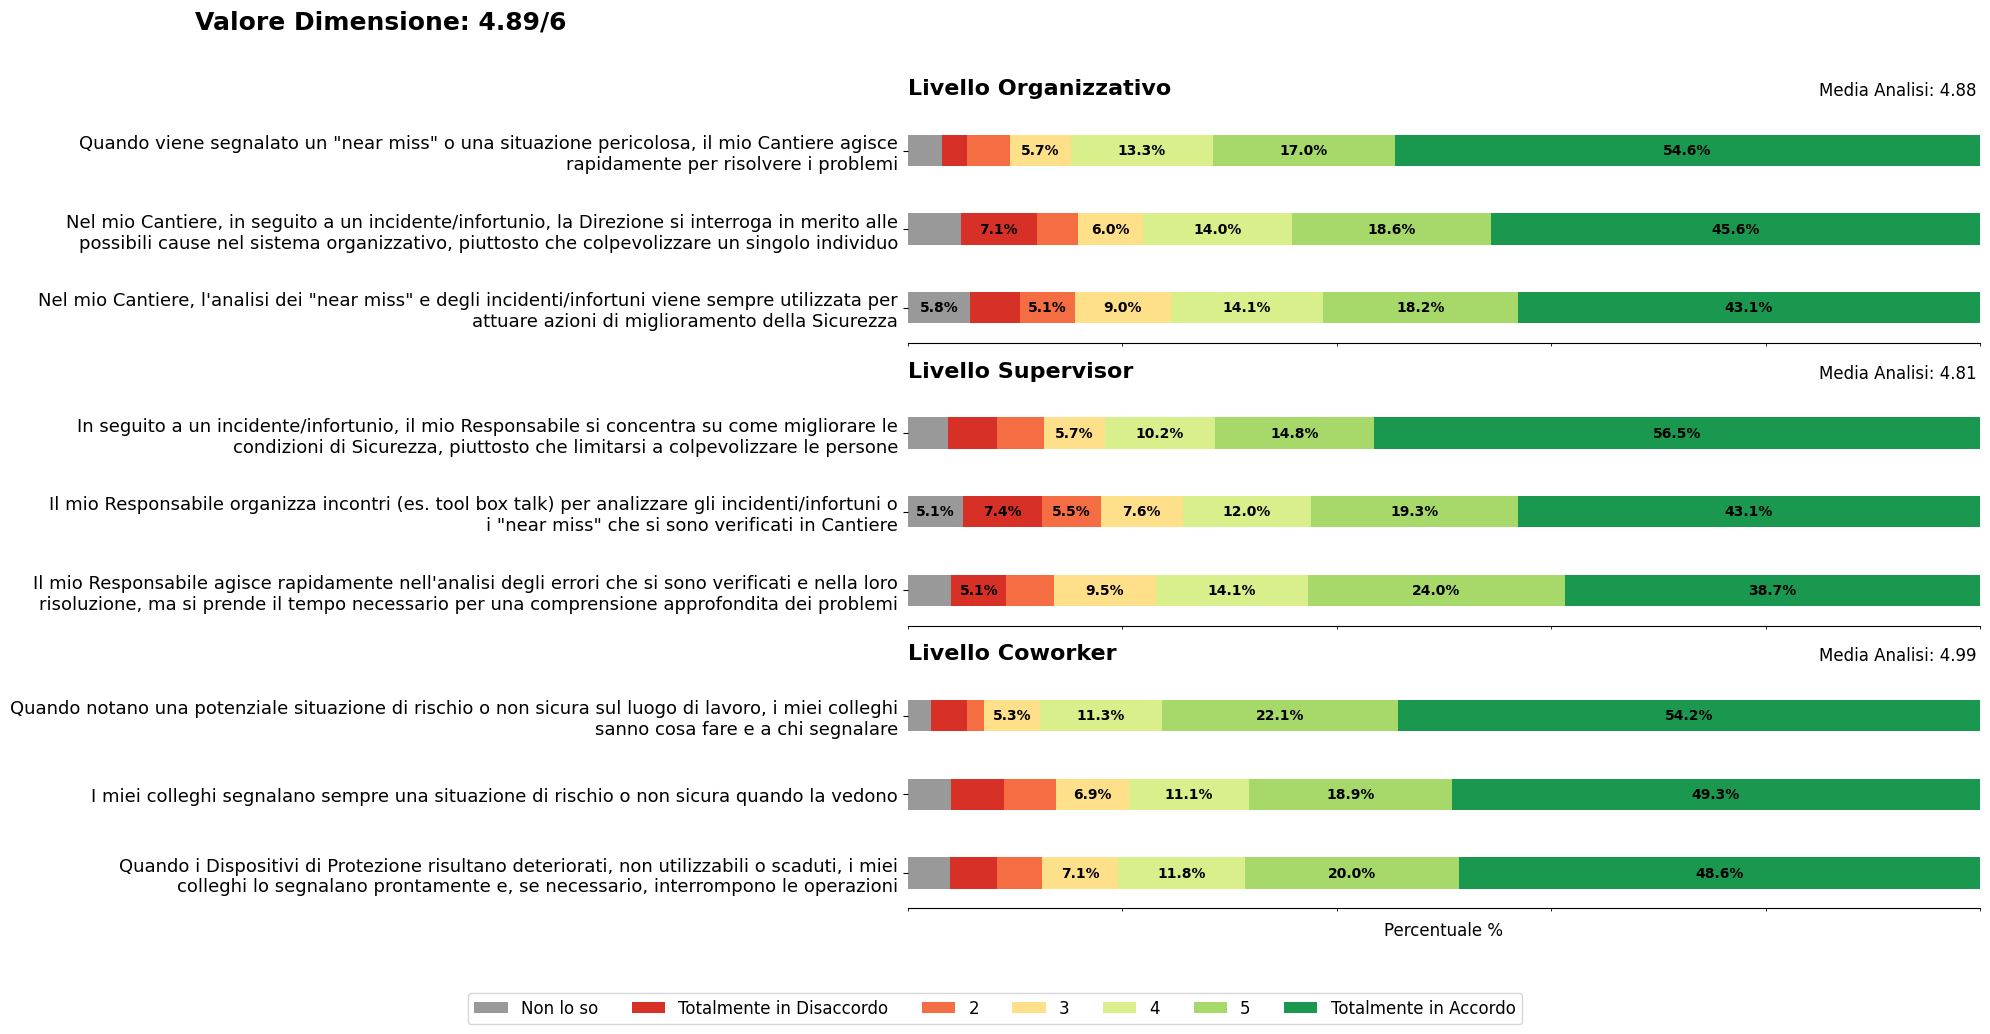

Generando grafici stratificati (età/anzianità)...


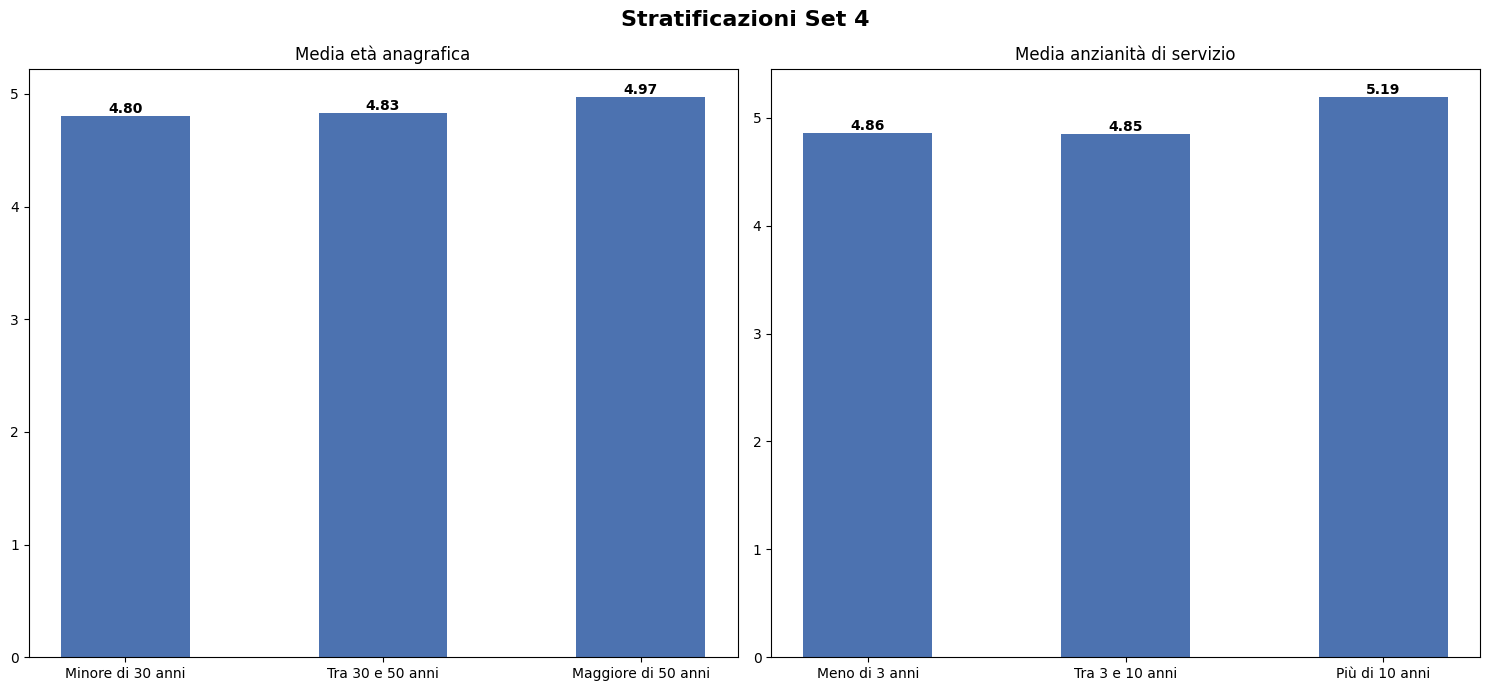

Set 4 completato!

=== SET 5: Sezioni [(48, 51), (51, 55), (55, 58)] ===
Generando grafico stacked...


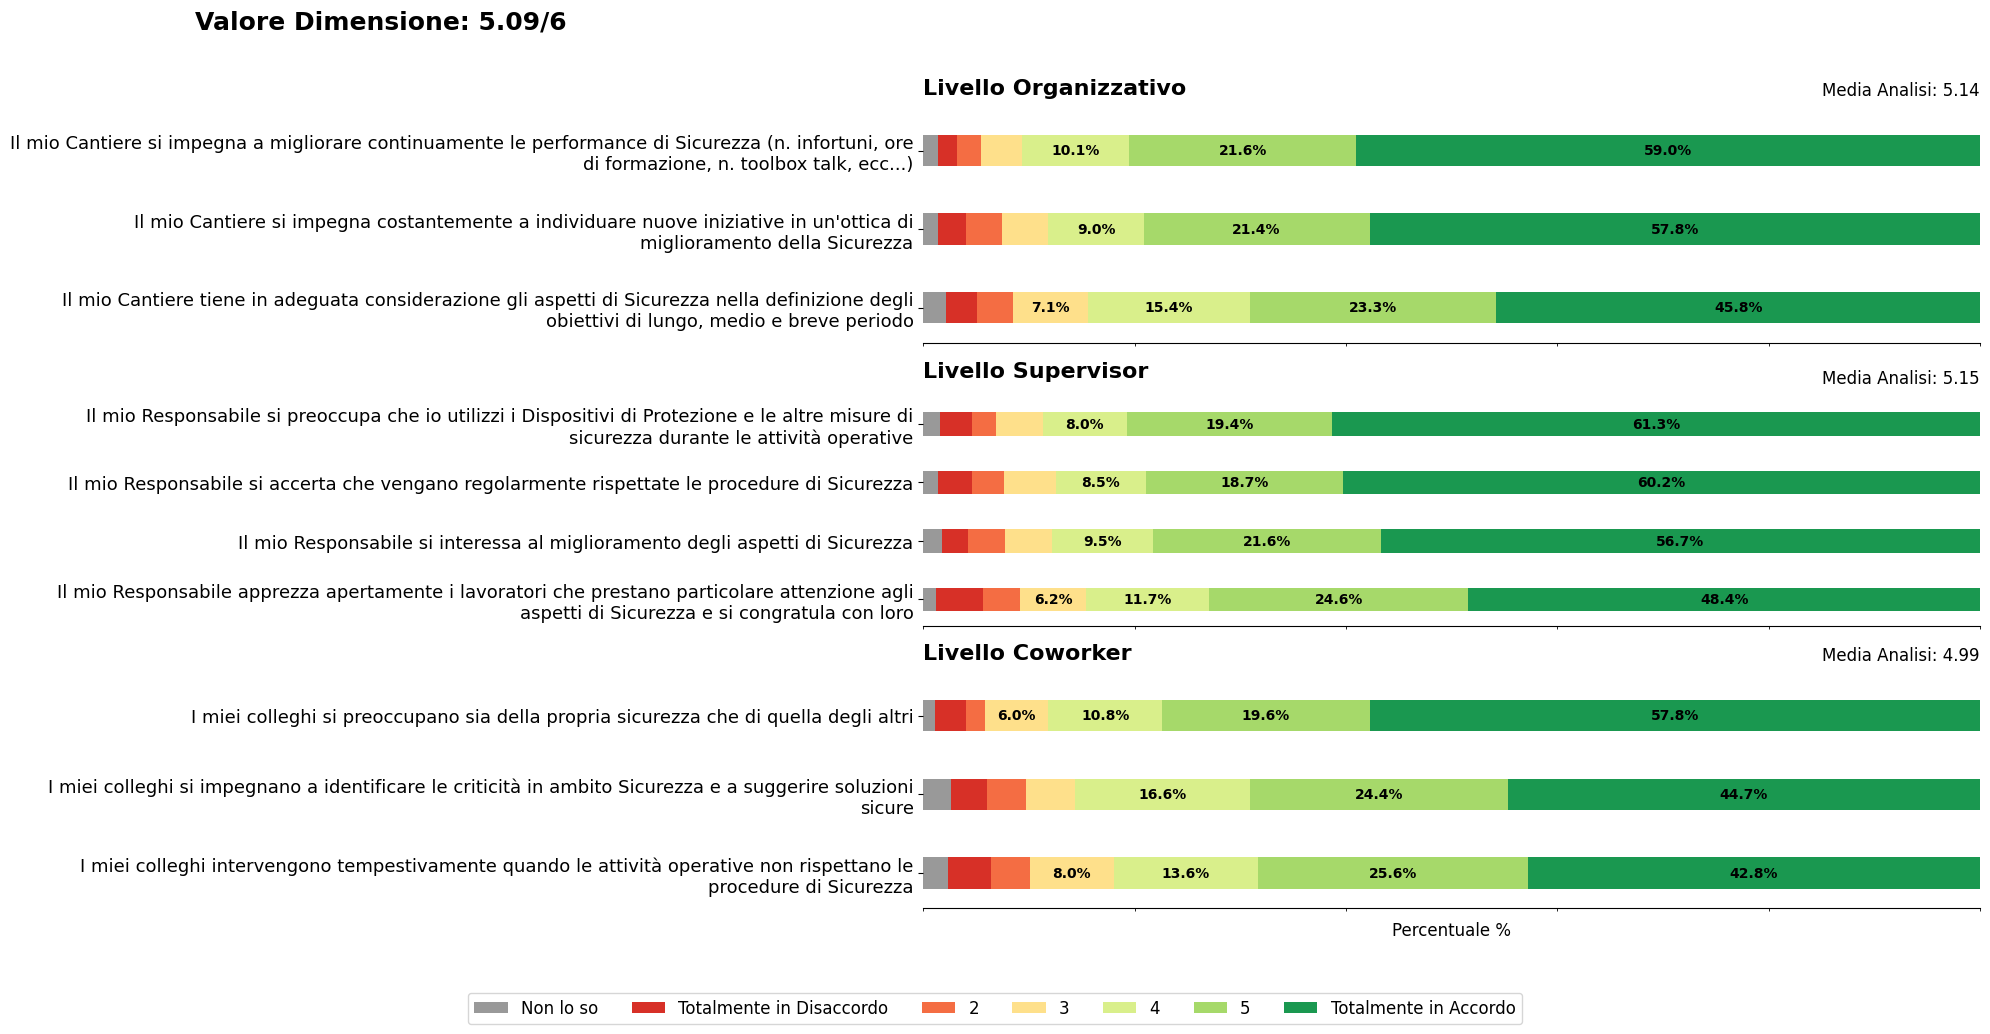

Generando grafici stratificati (età/anzianità)...


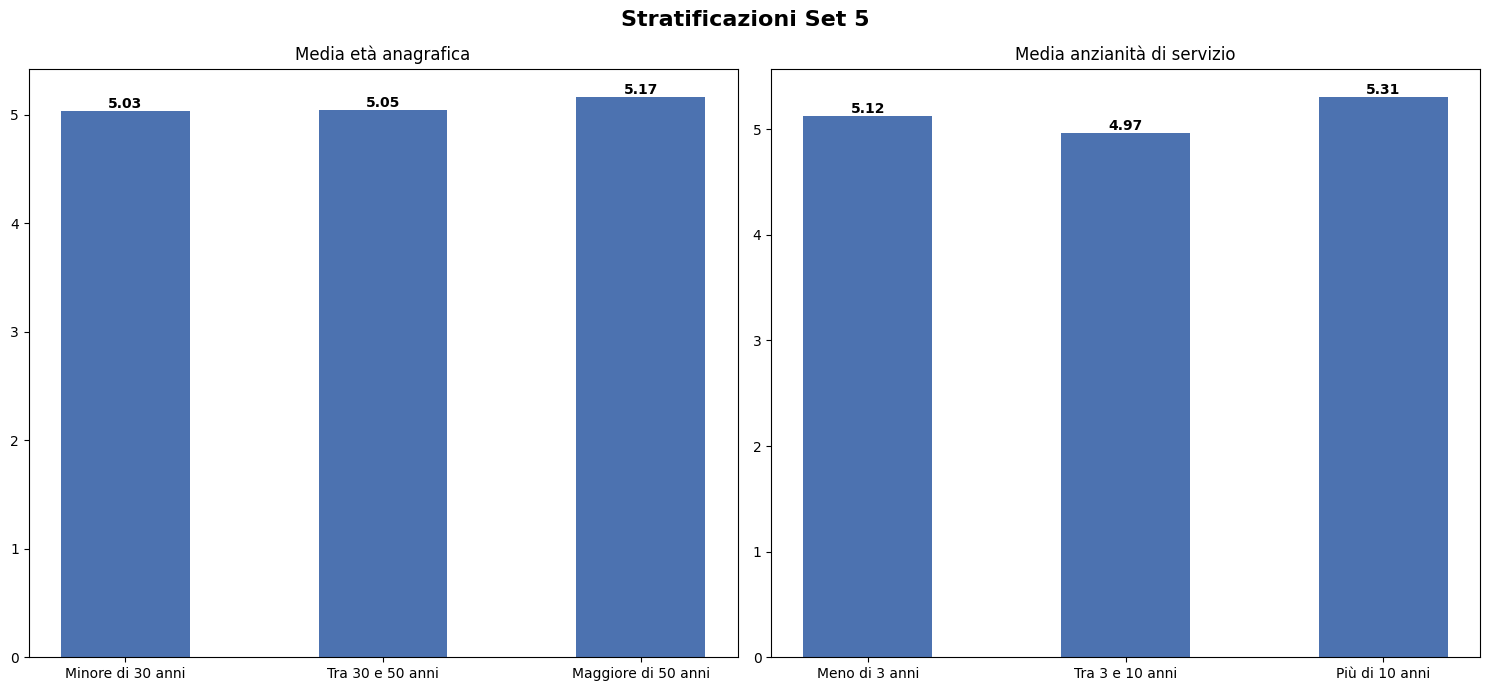

Set 5 completato!

=== SET 6: Sezioni [(58, 62), (62, 66), (66, 69)] ===
Generando grafico stacked...


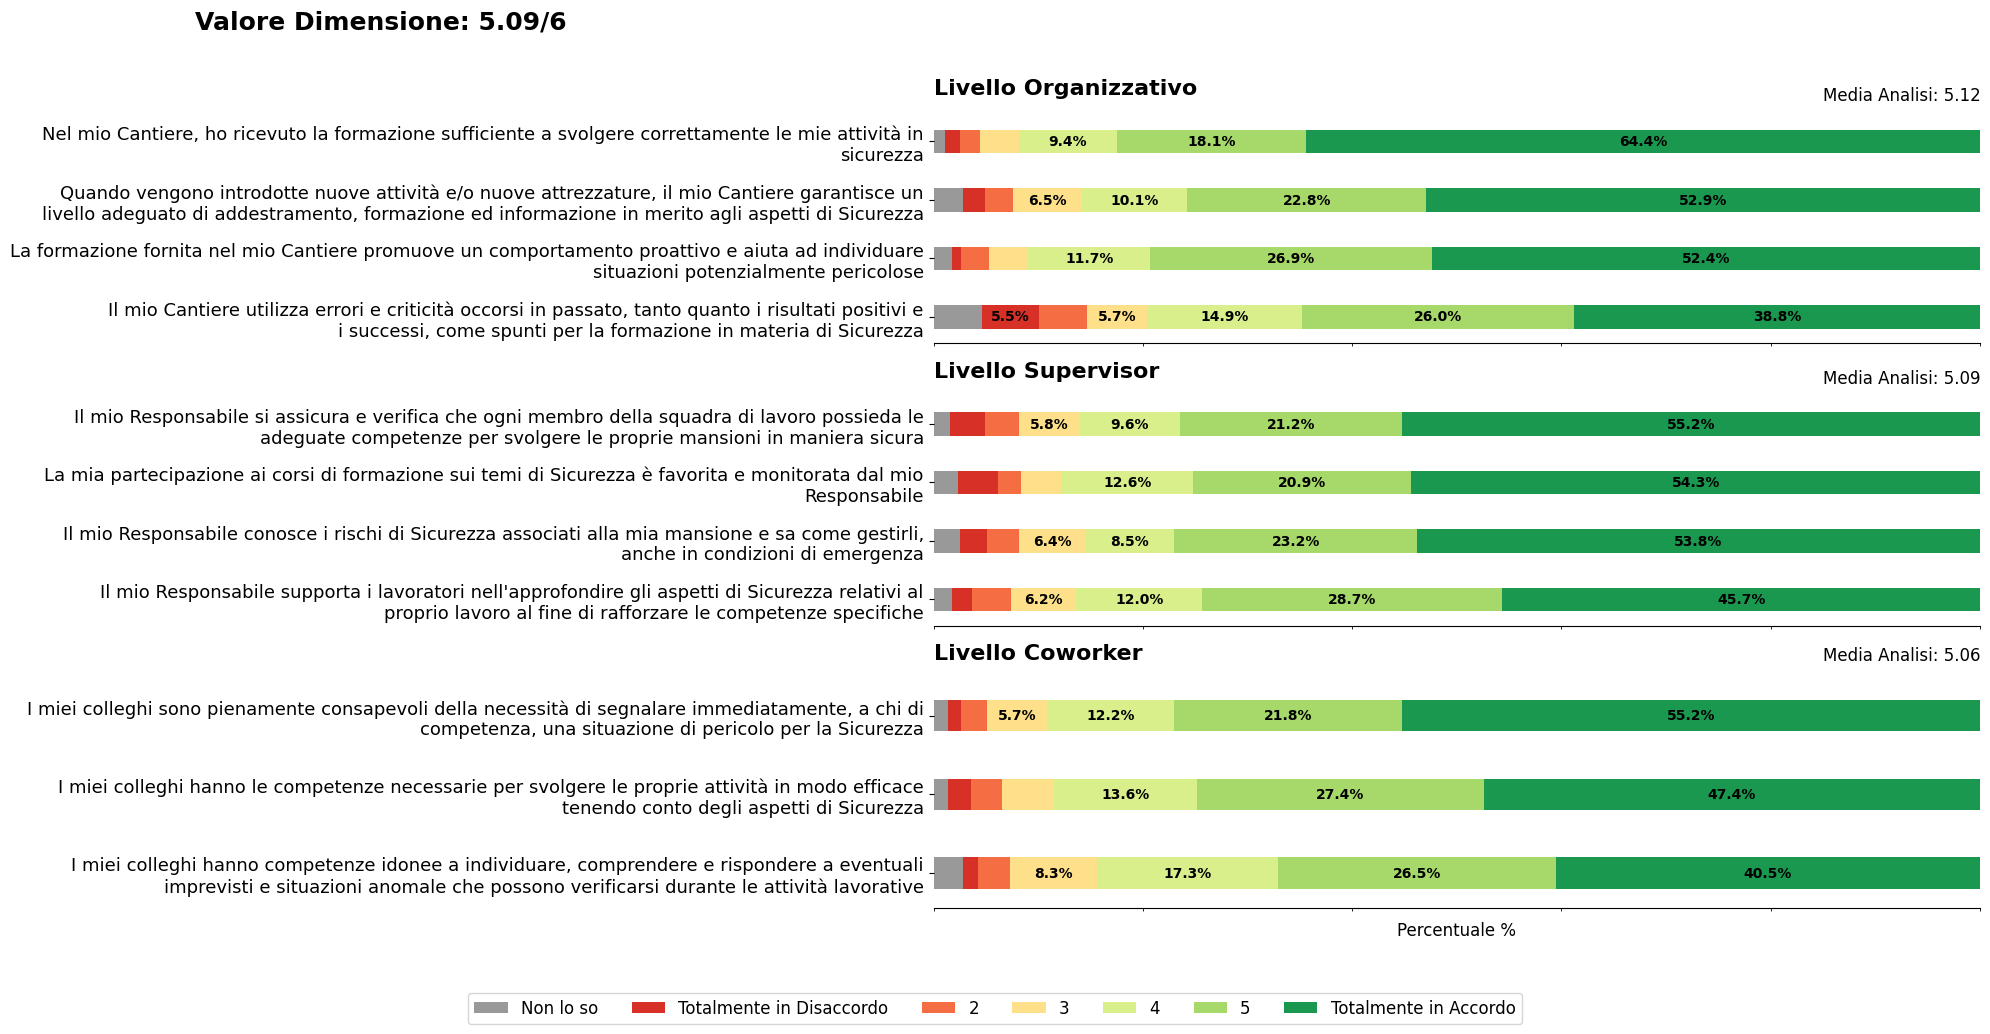

Generando grafici stratificati (età/anzianità)...


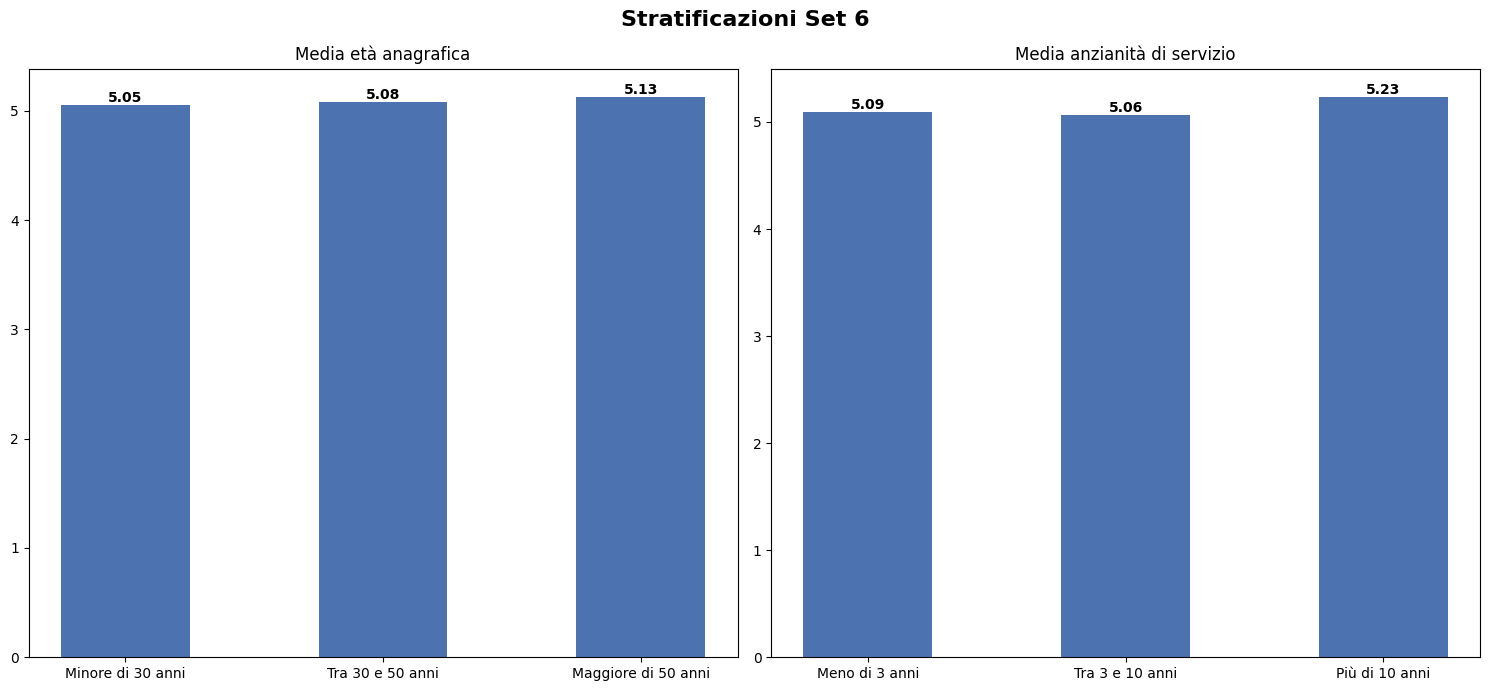

Set 6 completato!

=== SET 7: Sezioni [(69, 74)] ===
Generando grafico stacked...


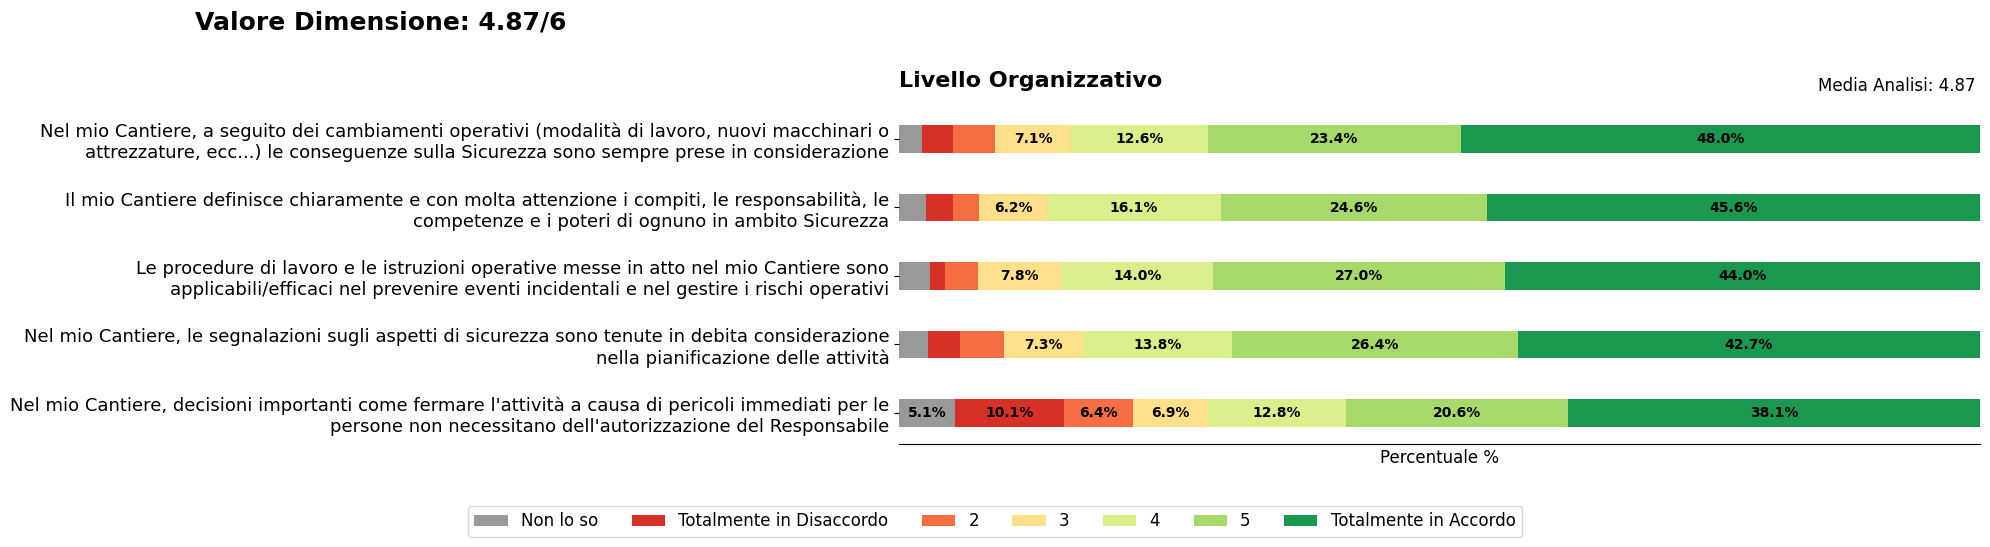

Generando grafici stratificati (età/anzianità)...


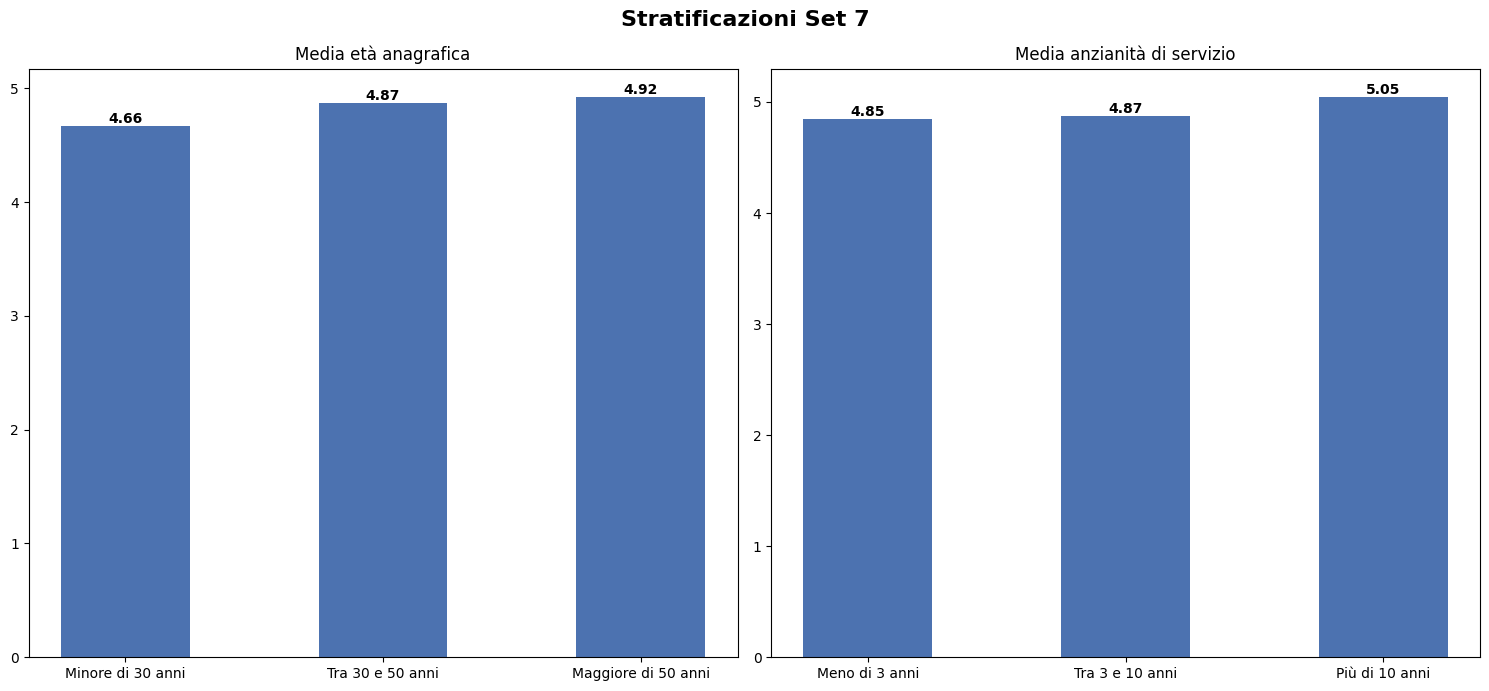

Set 7 completato!

=== SET 8: Sezioni [(74, 80)] ===
Generando grafico stacked...


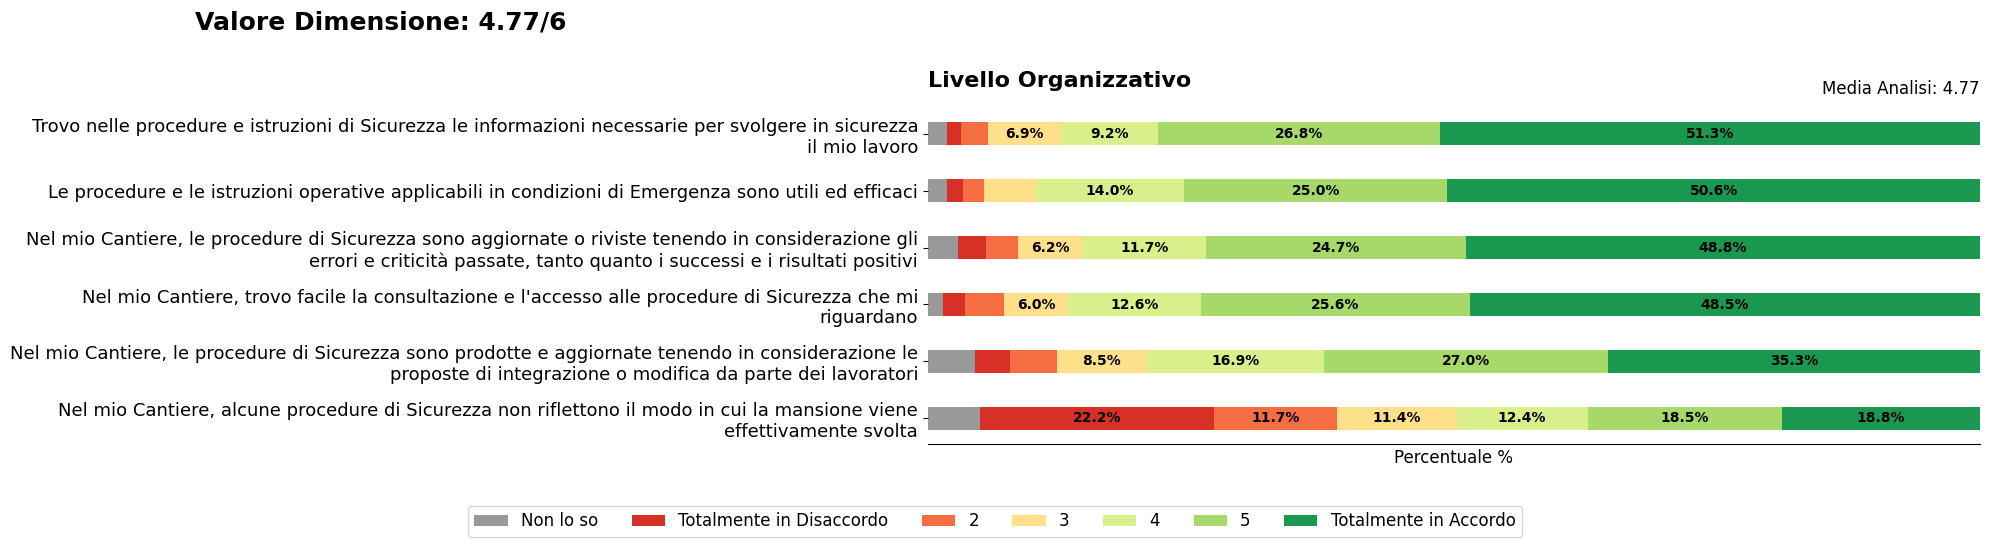

Generando grafici stratificati (età/anzianità)...


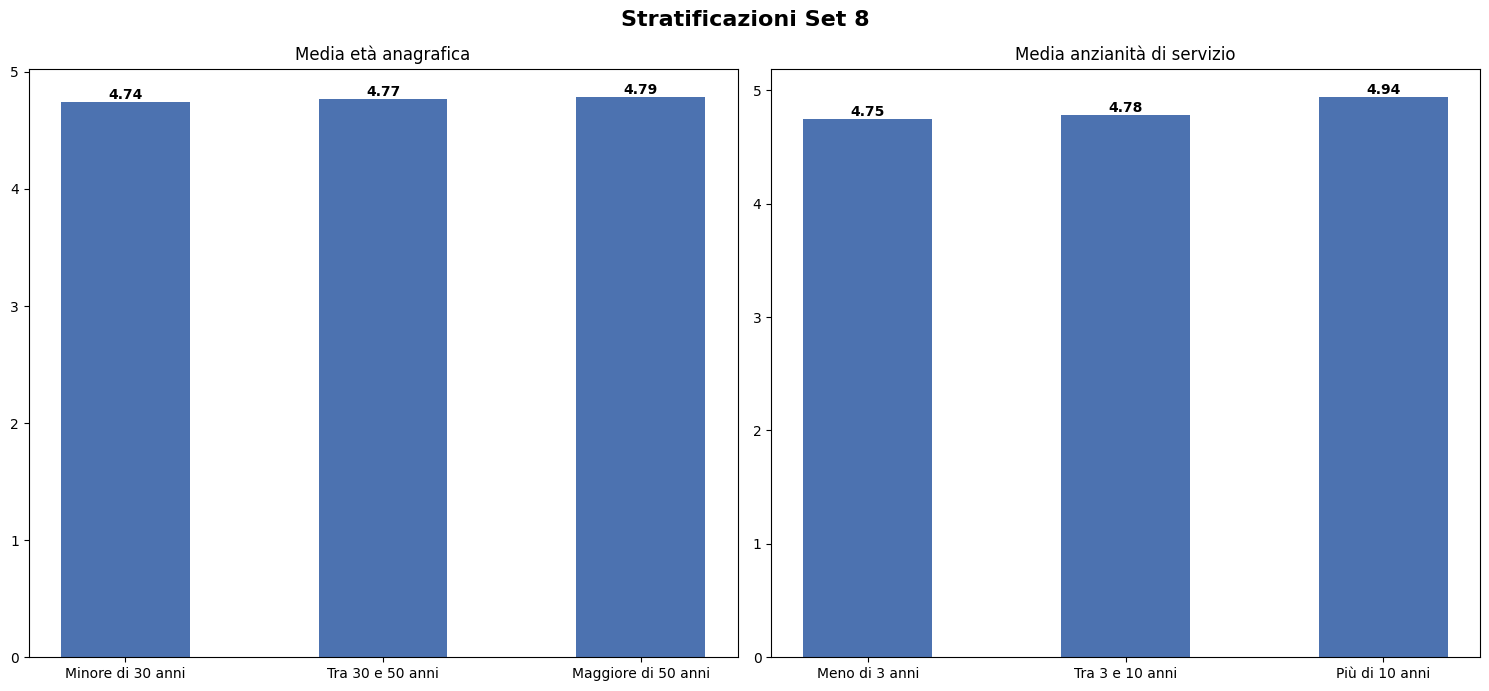

Set 8 completato!

Tutti i grafici sono stati generati!


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap

# ===== CONFIGURAZIONE GENERALE =====
# Definisci tutte le tue triplette di sezioni
tutte_le_triplette = [
    [(9, 13), (13, 16), (16, 19)],   # Prima tripletta
    [(19, 22), (22, 26), (26, 29)],  # Seconda tripletta
    [(29, 32), (32, 35), (35, 39)],  # Terza tripletta (esempio)
    [(39, 42), (42, 45), (45, 48)],  # Quarta tripletta (esempio)
    [(48, 51), (51, 55), (55, 58)],
    [(58, 62), (62, 66), (66, 69)],
    [(69,74)],
    [(74,80)]
]


# Titoli per ogni tripletta (per il grafico stacked)
titoli_triplette = ["Livello Organizzativo", "Livello Supervisor", "Livello Coworker"]

# Stratificazioni (età e anzianità)
stratificazioni = {
    'eta': {
        'col': 'Qual è la tua età anagrafica?',
        'ticks': ['Minore di 30 anni', 'Tra 30 e 50 anni', 'Maggiore di 50 anni'],
        'title': 'Media età anagrafica'
    },
    'age': {
        'col': 'Indica la tua anzianità di servizio in Webuild:',
        'ticks': ['Meno di 3 anni', 'Tra 3 e 10 anni', 'Più di 10 anni'],
        'title': 'Media anzianità di servizio'
    }
}

# Configurazione grafico stacked
mappa_nomi = {
    0: 'Non lo so', 
    1: 'Totalmente in Disaccordo', 
    2: '2', 
    3: '3', 
    4: '4', 
    5: '5', 
    6: 'Totalmente in Accordo'
}
colori = ['#999999', '#d73027', '#f46d43', '#fee08b', '#d9ef8b', '#a6d96a', '#1a9850']

# ===== FUNZIONI =====
def get_summary_dataset(subset):
    rows = []
    for col in subset.columns:
        perc = subset[col].value_counts(normalize=True) * 100
        df_row = pd.DataFrame(perc).T
        df_row.index = [col]
        rows.append(df_row)
    
    dataset = pd.concat(rows).fillna(0)
    dataset = dataset.sort_index(axis=1, ascending=True)
    
    medie = subset.apply(pd.to_numeric, errors='coerce').replace(0, np.nan).mean()
    dataset['Media'] = medie.round(2)
    dataset['Media_analisi'] = dataset['Media'].mean().round(2)
    
    return dataset

def get_stratified_means_full_benchmarks(data, subset_cols, stratifier_col):
    temp_df = data[subset_cols].apply(pd.to_numeric, errors='coerce').replace(0, np.nan)
    temp_df[stratifier_col] = data[stratifier_col]
    report_medie = temp_df.groupby(stratifier_col).mean().T
    
    for gruppo in report_medie.columns:
        report_medie[f'Media_eta_{gruppo}'] = report_medie[gruppo].mean()
    
    return report_medie.round(2)

def crea_grafico_stacked(sezioni, titoli, data, titolo_figura="Analisi"):
    """Crea un grafico stacked per una tripletta di sezioni (o singola sezione)"""
    # Genera i dataframe
    dfs = []
    for start, end in sezioni:
        df = get_summary_dataset(data.iloc[:, start:end]).sort_values(by=6, ascending=False)
        dfs.append(df)
    
    # Calcola la media delle medie analisi
    media_complessiva = pd.concat([df['Media_analisi'] for df in dfs]).unique().mean()
    
    # Determina il numero di subplot in base al numero di sezioni
    num_sezioni = len(sezioni)
    
    # Crea il grafico
    if num_sezioni == 1:
        # Caso singola sezione: un solo grafico
        fig, ax = plt.subplots(figsize=(20, 5))
        axes = [ax]  # Metti in lista per uniformità nel codice
    else:
        # Caso tripletta: 3 subplot
        fig, axes = plt.subplots(nrows=num_sezioni, ncols=1, figsize=(20, 10), sharex=True)
        if num_sezioni == 1:
            axes = [axes]  # Converti in lista se è un solo asse
    
    fig.suptitle(f"{titolo_figura}: {media_complessiva.round(2)}/6", 
                 fontsize=18, fontweight='bold', y=0.995, x=0.1, ha='left')
    
    for i, (df, titolo) in enumerate(zip(dfs, titoli)):
        ax = axes[i]
        df_plot = df.iloc[:, :-2].copy()
        labels_wrapped = [textwrap.fill(label, width=100) for label in df_plot.index]
        df_plot.index = labels_wrapped
        
        plot = df_plot.plot(kind='barh', stacked=True, color=colori, ax=ax, legend=False, width=0.4)
        
        for container in ax.containers:
            labels = [f'{v.get_width():.1f}%' if v.get_width() > 5 else '' for v in container]
            ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=10, fontweight='bold')
        
        ax.set_title(titolo, fontsize=16, fontweight='bold', loc='left', pad=15)
        ax.text(85, -0.7, f'Media Analisi: {df["Media"].mean():.2f}', fontsize=12)
        ax.tick_params(axis='y', labelsize=13) 
        ax.tick_params(axis='x', labelsize=11)
        ax.invert_yaxis() 
        ax.set_xlim(0, 100)
        ax.set_xlabel("Percentuale %", fontsize=12)
        ax.grid(axis='x', linestyle='--', alpha=0.3)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.set_xticks([])
    
    # Legenda
    etichette_legenda = [mappa_nomi[int(c)] for c in dfs[0].columns[:-2]]
    fig.legend(
        labels=etichette_legenda,
        loc='upper center',
        bbox_to_anchor=(0.5, 0.02),
        ncol=7,
        frameon=True,
        fontsize=12
    )
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.98]) 
    plt.show()
    
    return pd.concat(dfs)


def crea_grafico_stratificato(sezioni, stratificazioni, data, titolo_figura="Confronto Stratificazioni"):
    """Crea grafici di stratificazione (età/anzianità) per una tripletta (o singola sezione)"""
    risultati = {}
    
    for nome, config in stratificazioni.items():
        reports = []
        for start, end in sezioni:
            report = get_stratified_means_full_benchmarks(
                data, 
                data.iloc[:, start:end].columns,
                config['col']
            )
            reports.append(report)
        risultati[nome] = pd.concat(reports)
    
    # Verifica se ci sono dati sufficienti per creare i grafici
    # (almeno una delle stratificazioni deve avere valori)
    if not any(len(risultati[nome]) > 0 for nome in risultati):
        print(f"Avviso: Nessun dato disponibile per {titolo_figura}")
        return risultati
    
    # Crea il grafico
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
    fig.suptitle(titolo_figura, fontsize=16, fontweight='bold')
    
    for idx, (nome, config) in enumerate(stratificazioni.items()):
        # Verifica che ci siano almeno 3 colonne (i gruppi di stratificazione)
        if risultati[nome].shape[1] >= 3:
            medie = risultati[nome].iloc[:, :3].mean()
        else:
            # Se ci sono meno colonne, usa tutte quelle disponibili
            medie = risultati[nome].mean()
        
        axes[idx].bar(config['ticks'][:len(medie)], medie, width=0.5, color='#4c72b0')
        axes[idx].set_title(config['title'])
        axes[idx].bar_label(
            axes[idx].containers[0], 
            labels=[f'{v.get_height():.2f}' for v in axes[idx].containers[0]], 
            label_type='edge', 
            color='black', 
            fontsize=10,
            fontweight='bold'
        )
    
    plt.tight_layout()
    plt.show()
    
    return risultati

# ===== ESECUZIONE CICLO PRINCIPALE =====
print(f"Generazione di {len(tutte_le_triplette)} set di grafici...\n")


for idx, sezioni in enumerate(tutte_le_triplette, 1):
    print(f"=== SET {idx}: Sezioni {sezioni} ===")
    
    # 1. Grafico stacked
    print(f"Generando grafico stacked...")
    df_completo = crea_grafico_stacked(
        sezioni, 
        ["Livello Organizzativo", "Livello Supervisor", "Livello Coworker"], 
        data,
        titolo_figura= 'Valore Dimensione'
    )
    
    # 2. Grafici stratificati
    print(f"Generando grafici stratificati (età/anzianità)...")
    risultati_strat = crea_grafico_stratificato(
        sezioni, 
        stratificazioni, 
        data,
        titolo_figura=f"Stratificazioni Set {idx}"
    )
    
    print(f"Set {idx} completato!\n")

print("Tutti i grafici sono stati generati!")

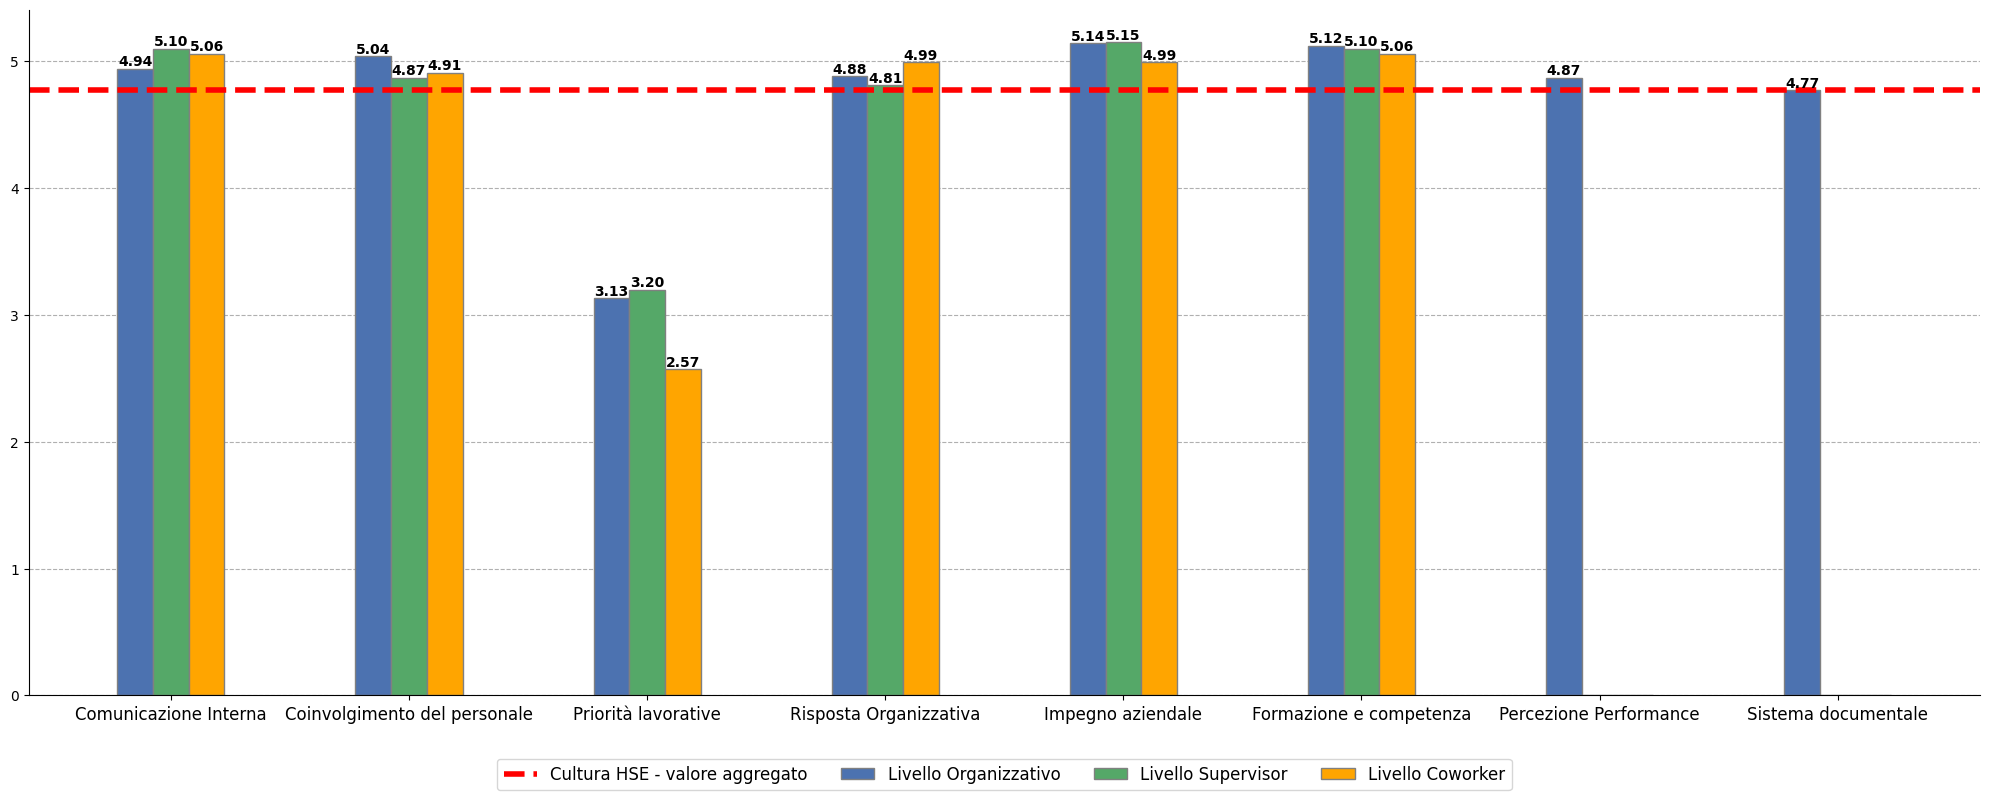

,Livello Organizzativo,Livello Supervisor,Livello Coworker
Comunicazione Interna,4.94,5.10,5.06
Coinvolgimento del personale,5.04,4.87,4.91
Priorità lavorative,3.13,3.20,2.57
Risposta Organizzativa,4.88,4.81,4.99
Impegno aziendale,5.14,5.15,4.99
Formazione e competenza,5.12,5.10,5.06
Percezione Performance,4.87,NaN,NaN
Sistema documentale,4.77,NaN,NaN


In [11]:
tutte_le_triplette = [
    [(9, 13), (13, 16), (16, 19)],   # Prima tripletta
    [(19, 22), (22, 26), (26, 29)],  # Seconda tripletta
    [(29, 32), (32, 35), (35, 39)],  # Terza tripletta (esempio)
    [(39, 42), (42, 45), (45, 48)],  # Quarta tripletta (esempio)
    [(48, 51), (51, 55), (55, 58)],
    [(58, 62), (62, 66), (66, 69)],
    [(69,74)],
    [(74,80)]
]

def crea_grafico_barre_raggruppate(tutte_le_triplette, titoli_triplette, data):
    medie_per_tripletta = []
    
    for sezioni in tutte_le_triplette:
        medie_sezione = []
        for start, end in sezioni:
            df = get_summary_dataset(data.iloc[:, start:end])
            media = df['Media_analisi'].unique()[0]  
            media_totale = media.mean()
            medie_sezione.append(media)
        
        # Completa con NaN se la tripletta ha meno di 3 valori
        while len(medie_sezione) < 3:
            medie_sezione.append(np.nan)
        
        medie_per_tripletta.append(medie_sezione)
    
    # Trasforma in array per facilità di manipolazione
    medie_array = np.array(medie_per_tripletta).T  # Trasponi per avere [sezione1, sezione2, sezione3]
    
    # Configurazione grafico
    barWidth = 0.15
    fig, ax = plt.subplots(figsize=(20, 8))
    
    # Posizioni delle barre
    n_triplette = len(tutte_le_triplette)
    br1 = np.arange(n_triplette)
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    
    # Colori per le tre sezioni
    colori_sezioni = ['#4c72b0', '#55a868', 'orange']  # Blu, Verde, Rosso
    
    # Etichette per le sezioni (usa i titoli della prima tripletta come riferimento)
    labels_sezioni = titoli_triplette if titoli_triplette else ['Sezione 1', 'Sezione 2', 'Sezione 3']
    
    # Crea le barre (sostituendo NaN con 0 per il plot, ma non mostrando la barra)
    bars1 = ax.bar(br1, np.nan_to_num(medie_array[0], nan=0), color=colori_sezioni[0], width=barWidth, 
                   edgecolor='grey', label=labels_sezioni[0])
    bars2 = ax.bar(br2, np.nan_to_num(medie_array[1], nan=0), color=colori_sezioni[1], width=barWidth, 
                   edgecolor='grey', label=labels_sezioni[1])
    bars3 = ax.bar(br3, np.nan_to_num(medie_array[2], nan=0), color=colori_sezioni[2], width=barWidth, 
                   edgecolor='grey', label=labels_sezioni[2])
    
    # Aggiungi i valori sopra le barre (solo se non sono NaN)
    for i, bars in enumerate([bars1, bars2, bars3]):
        labels = []
        for j, v in enumerate(bars):
            if not np.isnan(medie_array[i][j]):
                labels.append(f'{v.get_height():.2f}')
            else:
                labels.append('')
        ax.bar_label(bars, labels=labels, label_type='edge', color='black', fontsize=10, fontweight='bold')
    
    # Etichette sull'asse x
    ax.set_xticks([r + barWidth for r in range(n_triplette)])
    ax.set_xticklabels(['Comunicazione Interna', 'Coinvolgimento del personale', 
                        'Priorità lavorative', 'Risposta Organizzativa', 
                        'Impegno aziendale', 'Formazione e competenza', 
                        'Percezione Performance', 'Sistema documentale'], fontsize=12)  # Aggiungi "Leadership" per la settima
    ax.axhline(y= media_totale, color='red', linestyle='--', alpha=1, linewidth=4, label = 'Cultura HSE - valore aggregato') 
    # Legenda
    ax.legend(fontsize=12, loc='lower center',
              bbox_to_anchor=(0.5, -0.15),
              ncol=4,
              frameon=True)
    
    # Griglia
    ax.grid(axis='y', linestyle='--')
    ax.set_axisbelow(True)
    
    # Rimuovi bordi superiore e destro
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Restituisci le medie per riferimento
    return pd.DataFrame(
        medie_array.T, 
        columns=labels_sezioni,
        index=['Comunicazione Interna', 'Coinvolgimento del personale', 
               'Priorità lavorative', 'Risposta Organizzativa', 
               'Impegno aziendale', 'Formazione e competenza', 'Percezione Performance', 'Sistema documentale']
    )
crea_grafico_barre_raggruppate(tutte_le_triplette, titoli_triplette, data)

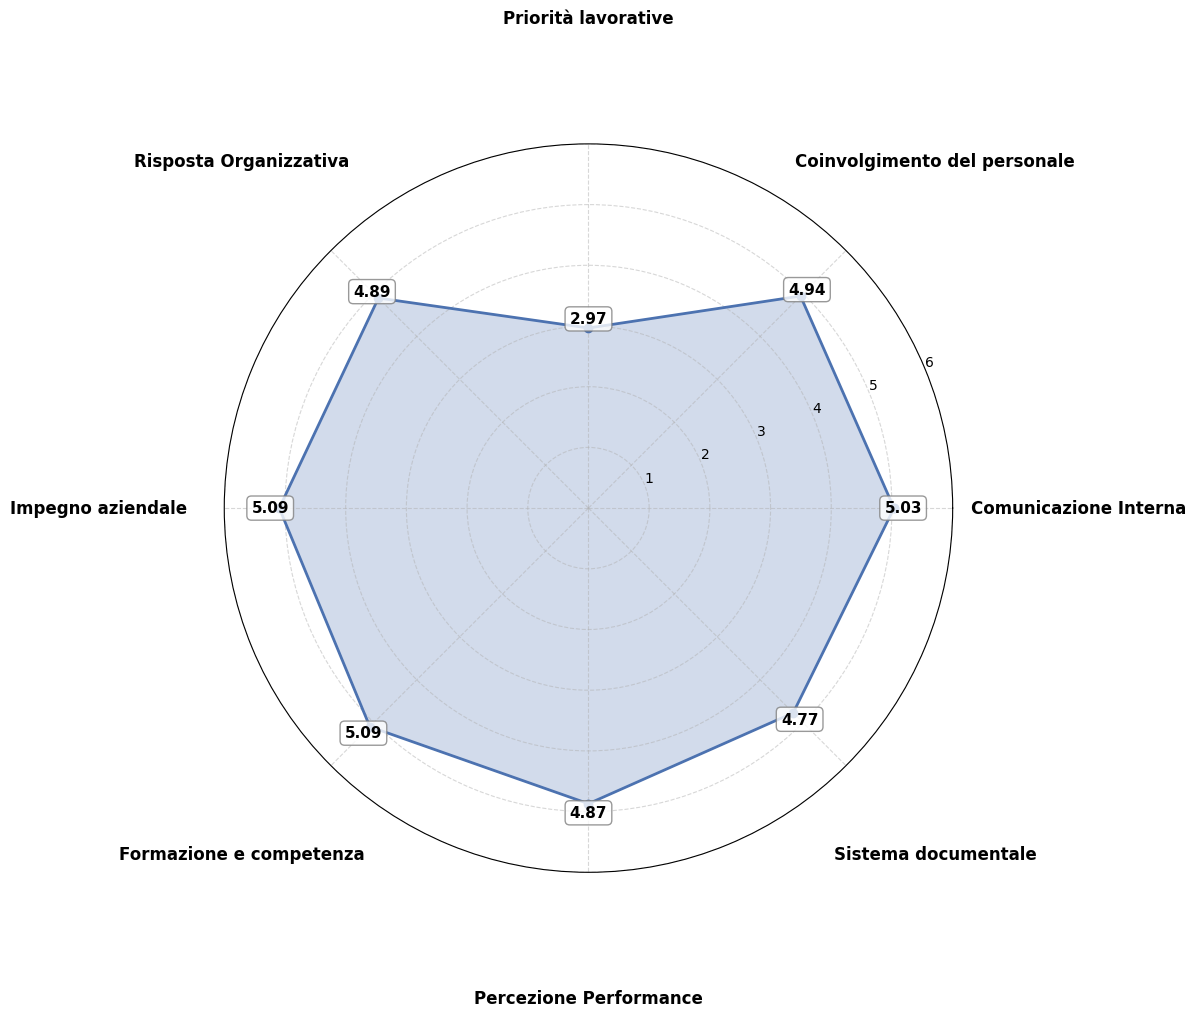


Valori del diagramma di Kiviat:
                      Categoria     Media
0         Comunicazione Interna  5.033333
1  Coinvolgimento del personale  4.940000
2           Priorità lavorative  2.966667
3        Risposta Organizzativa  4.893333
4             Impegno aziendale  5.093333
5       Formazione e competenza  5.093333
6        Percezione Performance  4.870000
7           Sistema documentale  4.770000


In [12]:
def crea_diagramma_kiviat(tutte_le_triplette, labels_categorie, data):
    """
    Crea un diagramma di Kiviat (radar chart) con le medie delle triplette
    """
    # Calcola le medie per ogni tripletta
    medie_categorie = []
    
    for sezioni in tutte_le_triplette:
        medie_sezione = []
        for start, end in sezioni:
            df = get_summary_dataset(data.iloc[:, start:end])
            media = df['Media_analisi'].unique()[0]
            medie_sezione.append(media)
        
        media_tripletta = np.mean(medie_sezione)
        medie_categorie.append(media_tripletta)
    
    num_vars = len(labels_categorie)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Chiudi il cerchio (aggiungi il primo valore alla fine)
    medie_categorie += medie_categorie[:1]
    angles += angles[:1]
    
    # Crea il grafico
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
    
    # Plotta i dati
    ax.plot(angles, medie_categorie, 'o-', linewidth=2, color='#4c72b0', label='Media Analisi')
    ax.fill(angles, medie_categorie, alpha=0.25, color='#4c72b0')
    
    # Aggiungi i valori sui punti
    for angle, media in zip(angles[:-1], medie_categorie[:-1]):
        ax.text(angle, media + 0.15, f'{media:.2f}', 
                ha='center', va='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.8))
    
    # Imposta le etichette
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels_categorie, fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', pad=80)
    # Imposta i limiti radiali
    ax.set_ylim(0, 6)
    
    # Aggiungi griglia
    ax.grid(True, linestyle='--', alpha=0.5)
    
    
    
    plt.tight_layout()
    plt.show()
    
    # Restituisci il dataframe con i risultati
    return pd.DataFrame({
        'Categoria': labels_categorie,
        'Media': medie_categorie[:-1]  # Rimuovi l'ultimo elemento duplicato
    })

# Definisci le label
labels_categorie = [
    'Comunicazione Interna', 
    'Coinvolgimento del personale', 
    'Priorità lavorative', 
    'Risposta Organizzativa', 
    'Impegno aziendale', 
    'Formazione e competenza', 
    'Percezione Performance', 
    'Sistema documentale'
]

# Crea il diagramma
df_kiviat = crea_diagramma_kiviat(tutte_le_triplette, labels_categorie, data)
print("\nValori del diagramma di Kiviat:")
print(df_kiviat)